In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import yaml
import numpy as np
import requests

In [3]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
    with open('../../data/dat.csv', 'wb') as f:
        f.write(response.content)

In [4]:
PATH_TO_DATA = '../../data/dat.csv'
PATH_TO_INDEX_INTERPRETATIONS = '../../R/value_labels.yml'

In [5]:
consultation_data = pd.read_csv(PATH_TO_DATA)

In [6]:
variable_labels = pd.read_csv('../../data/Variabelen_DJA_shortlabels.csv', encoding='ISO-8859-1')
index_interpretations = yaml.safe_load(open(PATH_TO_INDEX_INTERPRETATIONS))

In [72]:
def get_labels(data_frame, variable_labels, index_interpretations, column_name):
    column_interpretation = variable_labels.loc[variable_labels['short']==column_name]['Label'].values[0]
    
    relevant_column_counts = data_frame[column_name].value_counts()
    
    index_interpretations_for_column = index_interpretations[column_name]
    
    labels = []
    column_counts_including_zeros = np.zeros(len(index_interpretations_for_column)-1)
    
    for key in index_interpretations_for_column.keys():
        if not key == 'class':
            index = int(key)
            
            if index in data_frame[column_name].unique():
                column_counts_including_zeros[index-1] = relevant_column_counts[index]
                
            try:
                current_label_interpretation = index_interpretations[column_name][key]
            except:
                current_label_interpretation = 'unknown'    

            labels.append(current_label_interpretation)
    
    return labels, column_interpretation, column_counts_including_zeros

In [70]:
def get_plotting_data(data_frame, variable_labels, index_interpretations, column_name):
    
    (labels, column_interpretation, relevant_column_counts_sorted) = get_labels(data_frame, variable_labels, index_interpretations, column_name)
    
    #values = relevant_column_counts_sorted.values
    
    return labels, relevant_column_counts_sorted, column_interpretation

In [9]:
def finalize_figure(column_interpretation, save_folder, prefix, column_name):
    if len(prefix) > 0:
        title = '%s\n%s' % (prefix, column_interpretation)
    else:
        title = column_interpretation
        
    plt.title(title)
    
    if len(save_folder) > 0:
        plt.savefig('%s/%s.png' % (save_folder, column_name), bbox_inches='tight')

In [10]:
def format_autopct(values):
    def autopct_formatted(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return autopct_formatted

In [57]:
def create_pie_chart(data_frame, variable_labels, index_interpretations, column_name, column_of_interest = '', category_of_interest = '', save_folder = '', prefix = ''):
    if len(column_of_interest) > 0:
        data_frame = data_frame.loc[data_frame[column_of_interest]==category_of_interest]
    
    (labels, values, column_interpretation) = \
      get_plotting_data(data_frame, variable_labels, index_interpretations, column_name)
        
    plt.figure()
    plt.pie(values, labels=labels, autopct = format_autopct(values))
    
    if len(column_of_interest) > 0:
        finalize_figure(category_of_interest, save_folder, column_interpretation, '%s-%s' % (column_name, category_of_interest))
    else:
        finalize_figure(column_interpretation, save_folder, prefix, column_name)

In [11]:
def create_bar_chart(data_frame, variable_labels, index_interpretations, column_name, save_folder = '', prefix = ''):
    (labels, values, column_interpretation) = \
      get_plotting_data(data_frame, variable_labels, index_interpretations, column_name)
    
    plt.figure(figsize=(6,6))
    plt.bar(x = labels, height = values)
    plt.ylabel('')
    plt.xticks(rotation = 90)
    
    finalize_figure(column_interpretation, save_folder, prefix, column_name)

In [12]:
def create_stacked_bar_chart(data_frame, variable_labels, index_interpretations, column_name_x, column_name_to_stack, save_folder = '', prefix = ''):
    (labels, column_interpretation, relevant_column_counts_sorted) = get_labels(data_frame, variable_labels, index_interpretations, column_name_x)
    
    regrouped_data = data_frame.groupby([column_name_x, column_name_to_stack])[column_name_x].count().unstack(column_name_to_stack)
    
    plt.figure()
    regrouped_data.plot(kind='bar', stacked=True)
    
    plt.xlabel('')
    plt.xticks(np.arange(0, len(labels)), labels=labels, rotation = 90)
    plt.legend(bbox_to_anchor=(1, 0.5) , loc='center left')
    
    finalize_figure(column_interpretation, save_folder, prefix, column_name_x)
    
    return labels

In [13]:
single_column_answers = ['quit', 'major_changes', 'carreer_success',\
                         'award_fair', 'award_lottery', 'award_time',\
                         'award_bandwagon', 'co_private', 'co_connections',\
                         'co_irrelevant', 'review_info',\
                         'review_confidence', 'review_informative',\
                         'review_more', 'review_government']

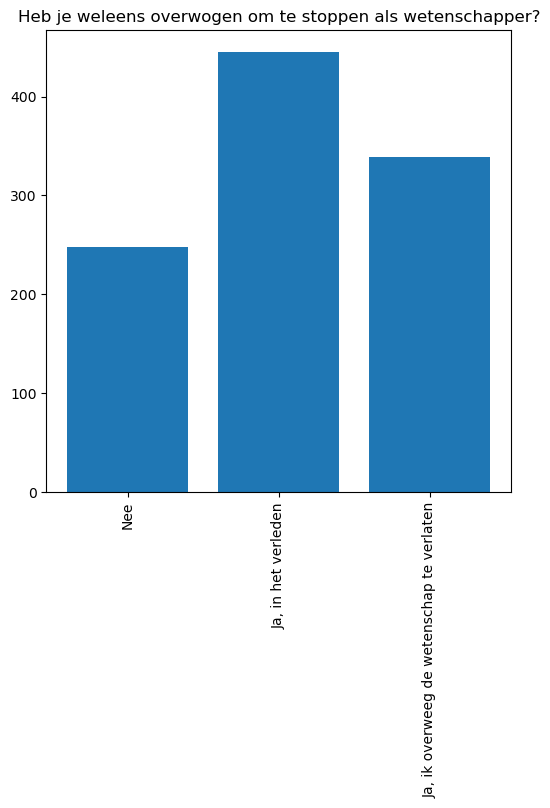

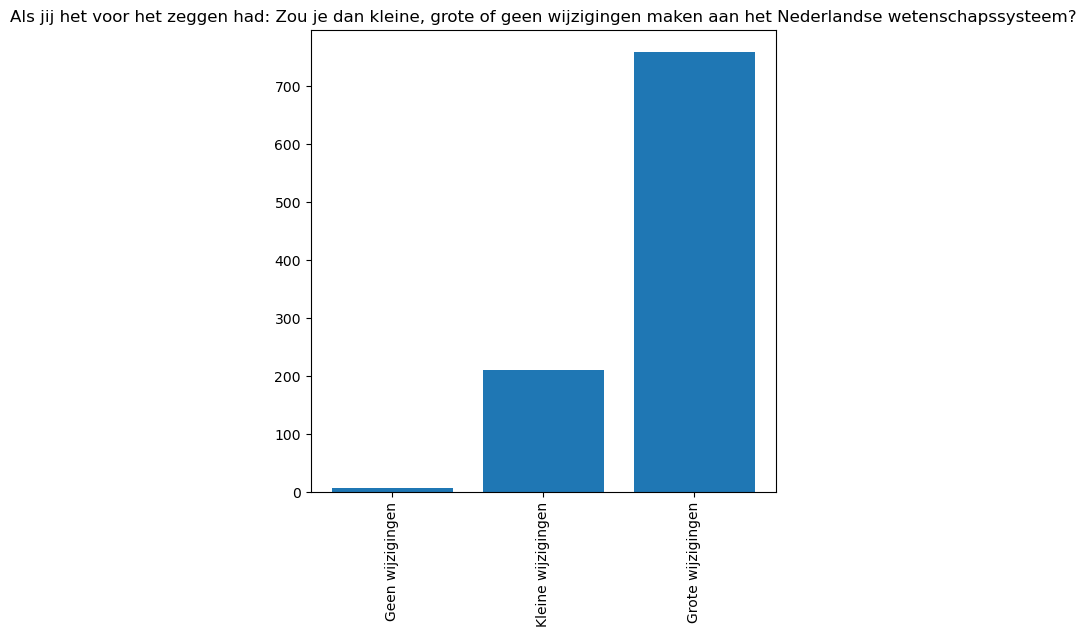

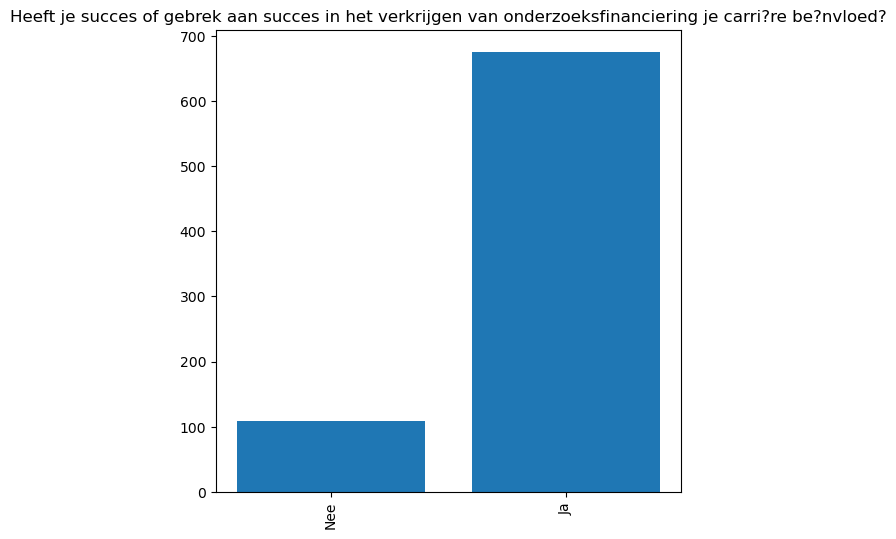

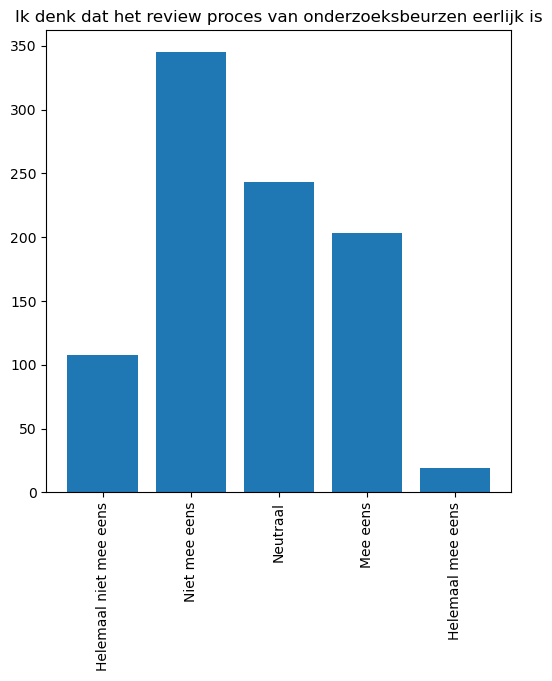

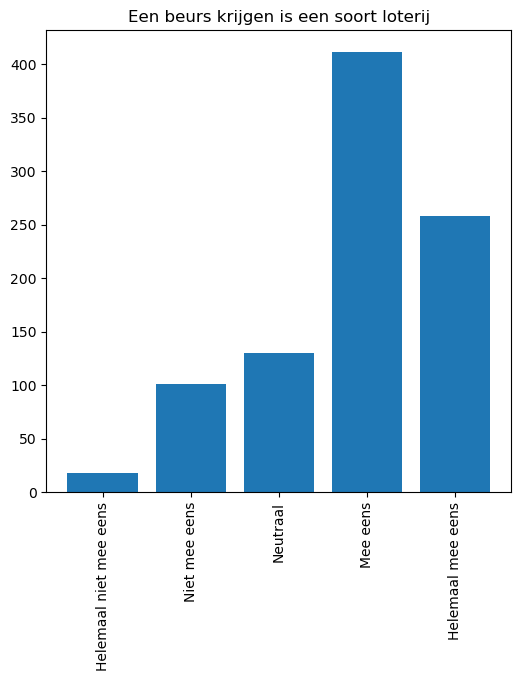

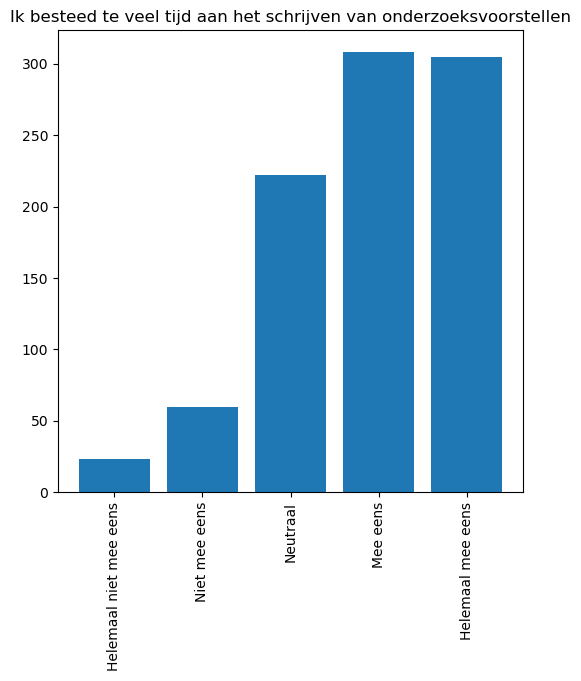

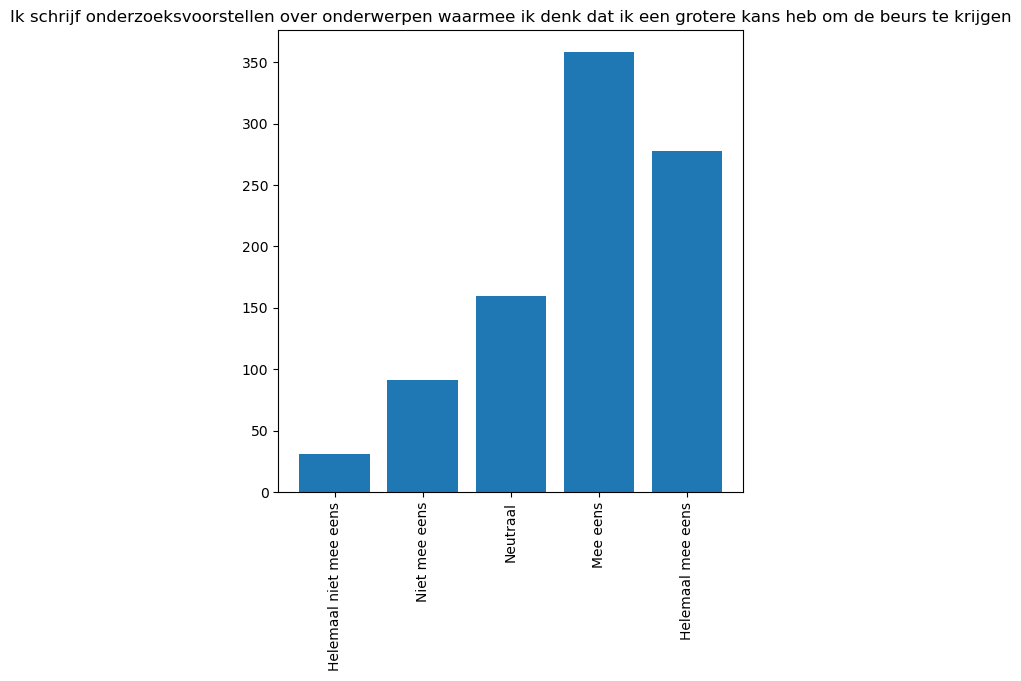

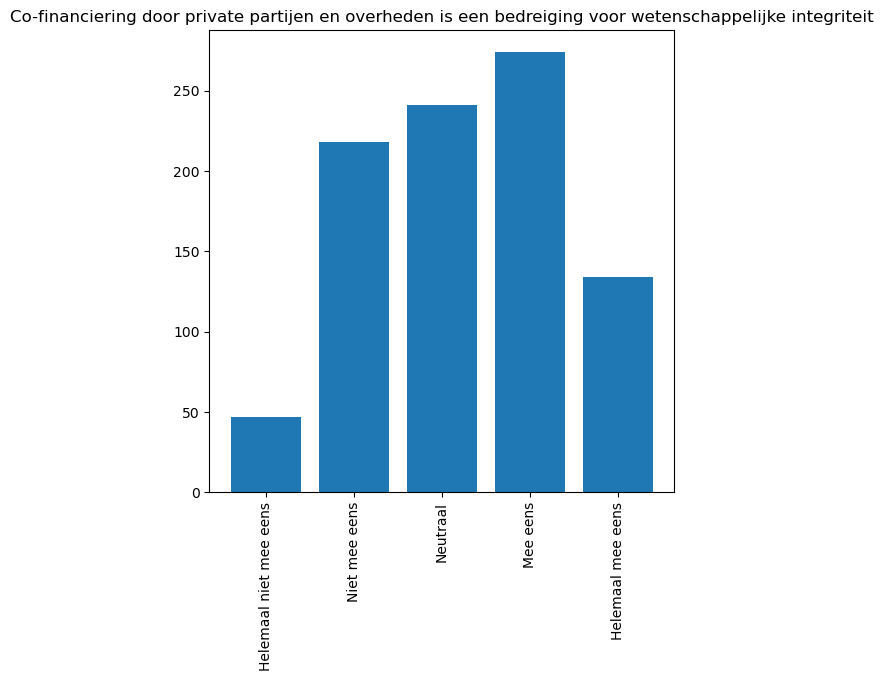

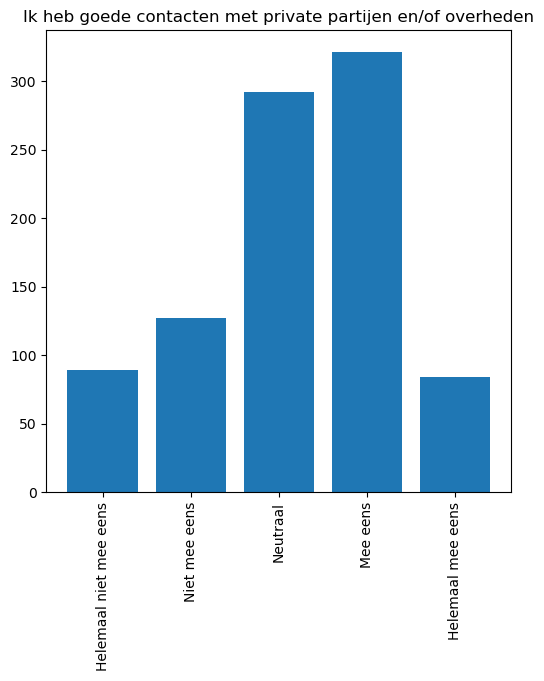

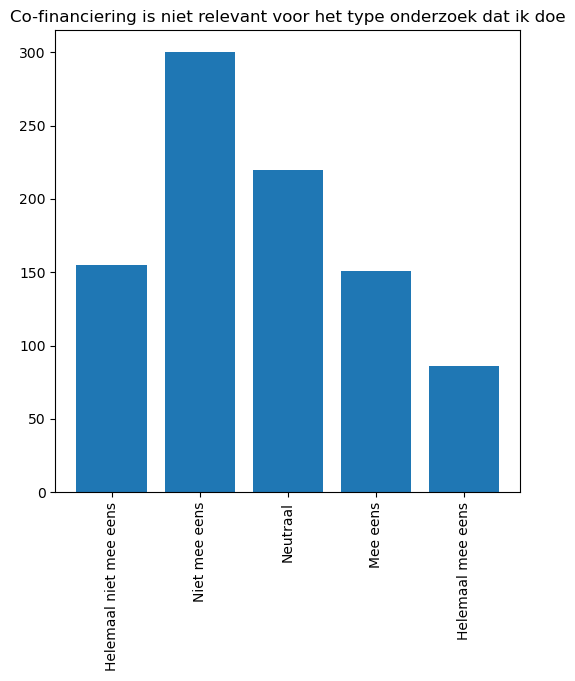

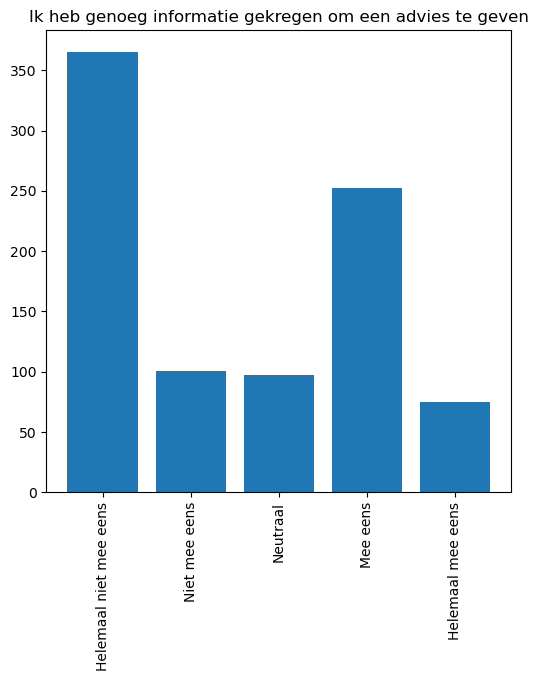

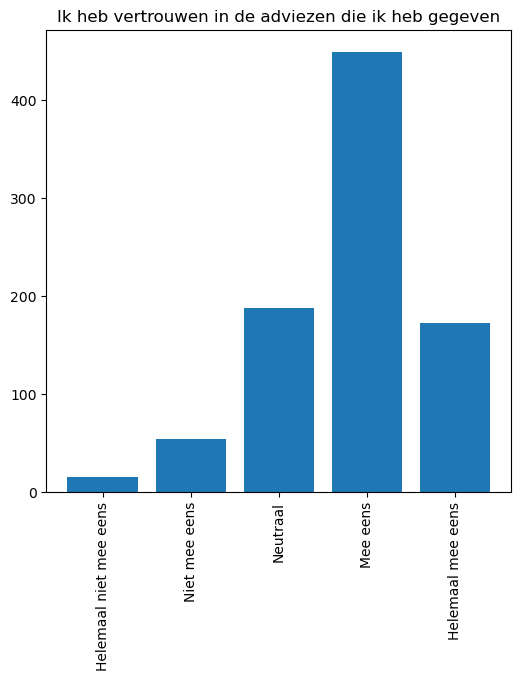

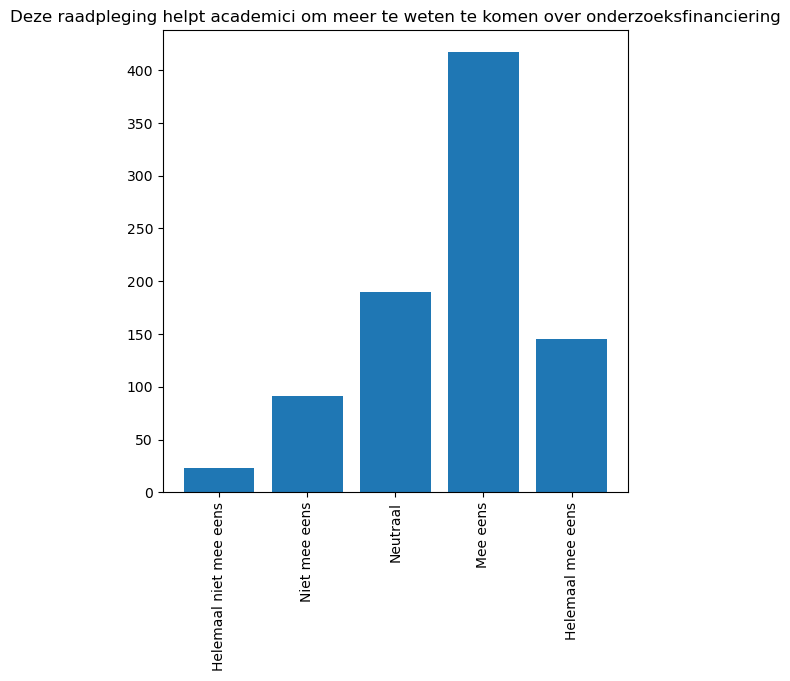

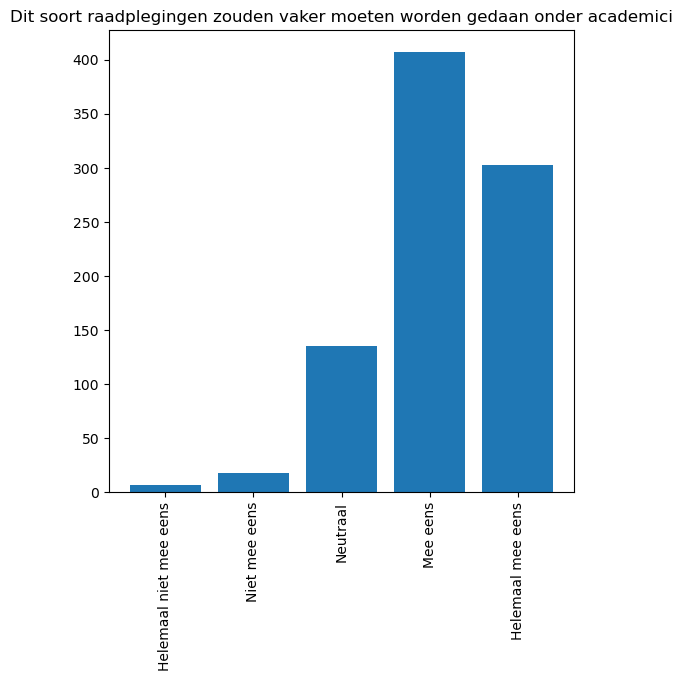

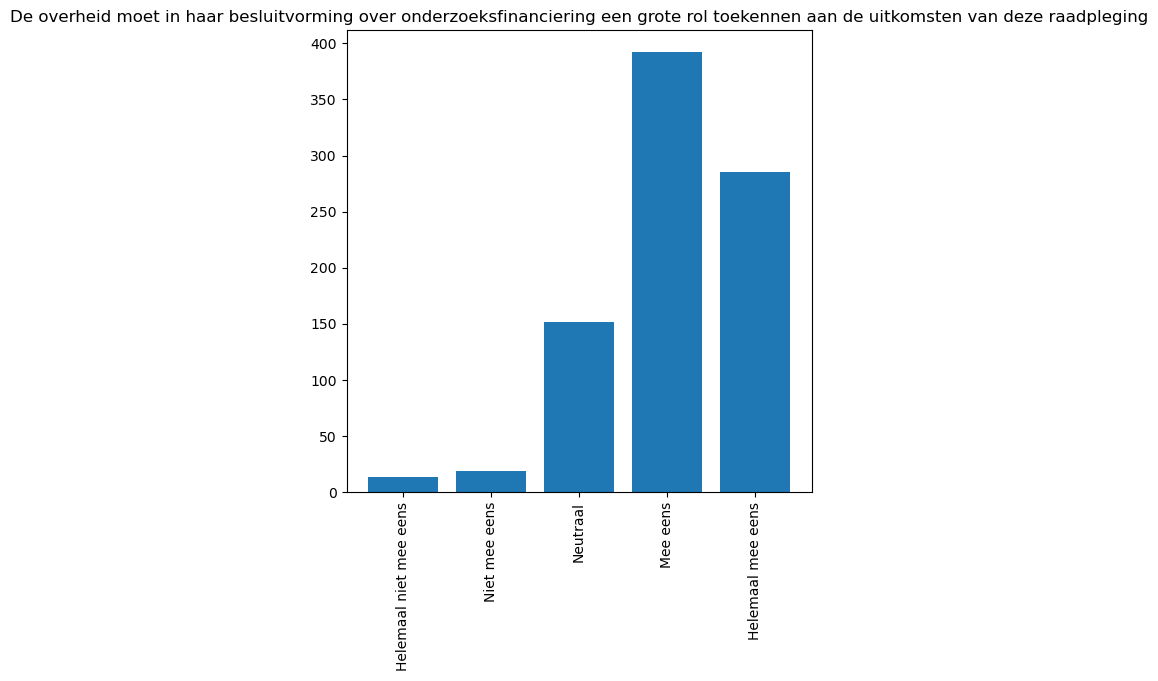

In [14]:
PLOTTING_FOLDER = 'plots_bar'
if not os.path.exists(PLOTTING_FOLDER):
    os.mkdir(PLOTTING_FOLDER)

for category in single_column_answers:
    create_bar_chart(consultation_data, variable_labels, index_interpretations, category)

/var/folders/qj/5mq62lfj5zngm8hgp_wdrph80000gn/T/ipykernel_89265/1854894288.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

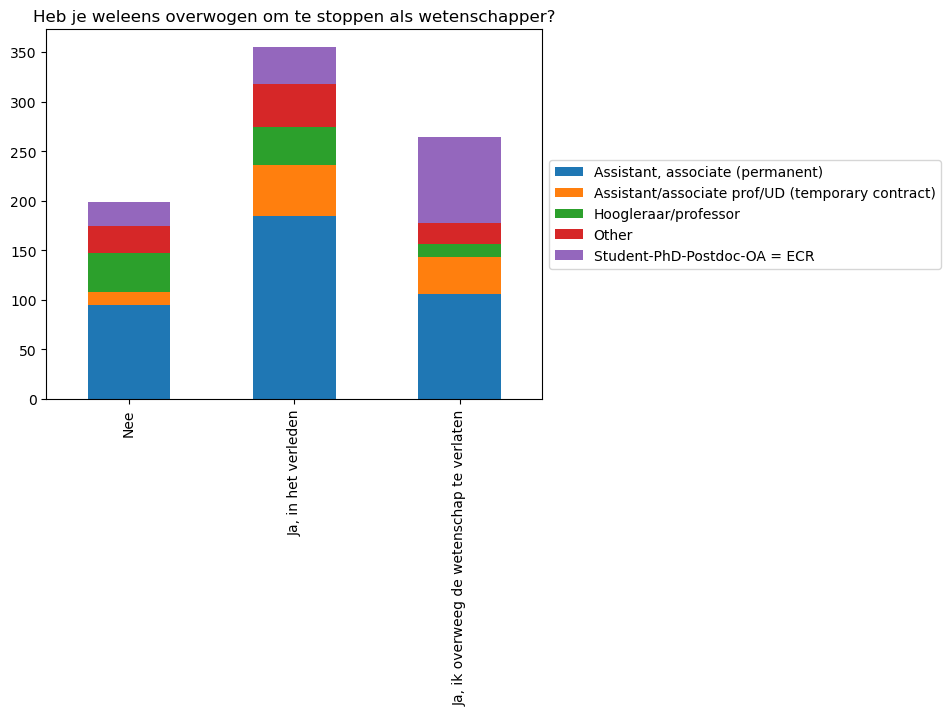

<Figure size 640x480 with 0 Axes>

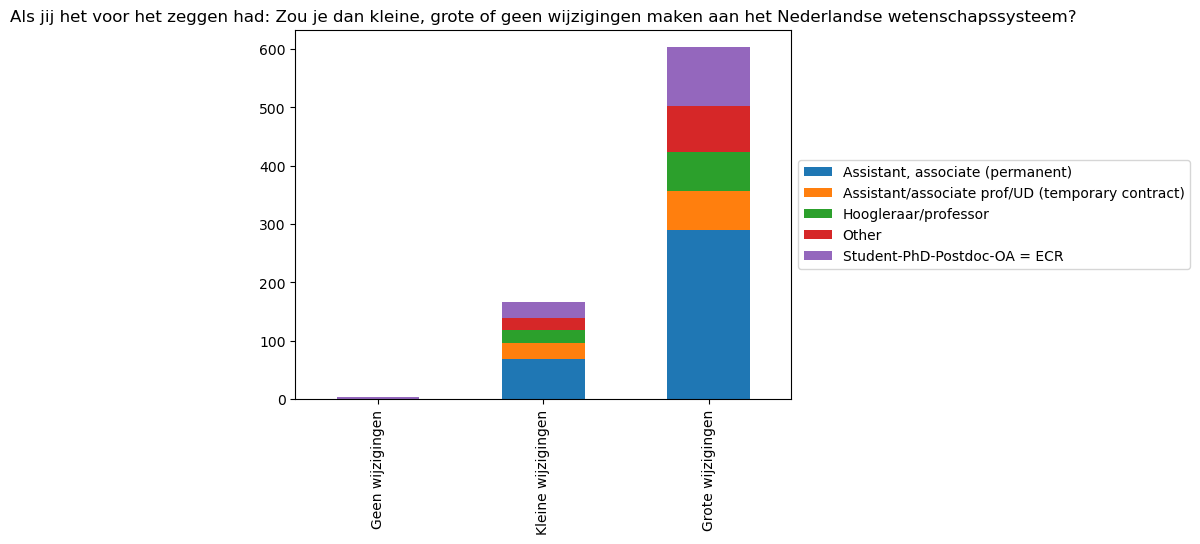

<Figure size 640x480 with 0 Axes>

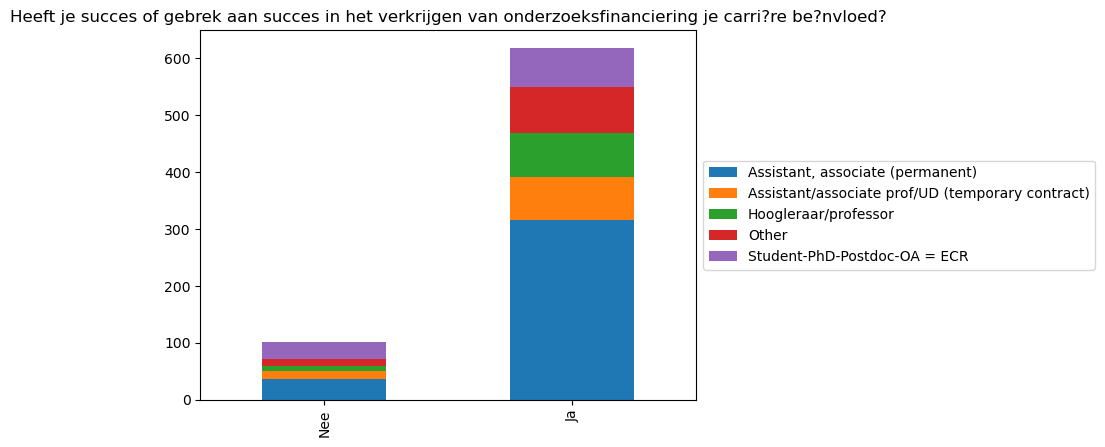

<Figure size 640x480 with 0 Axes>

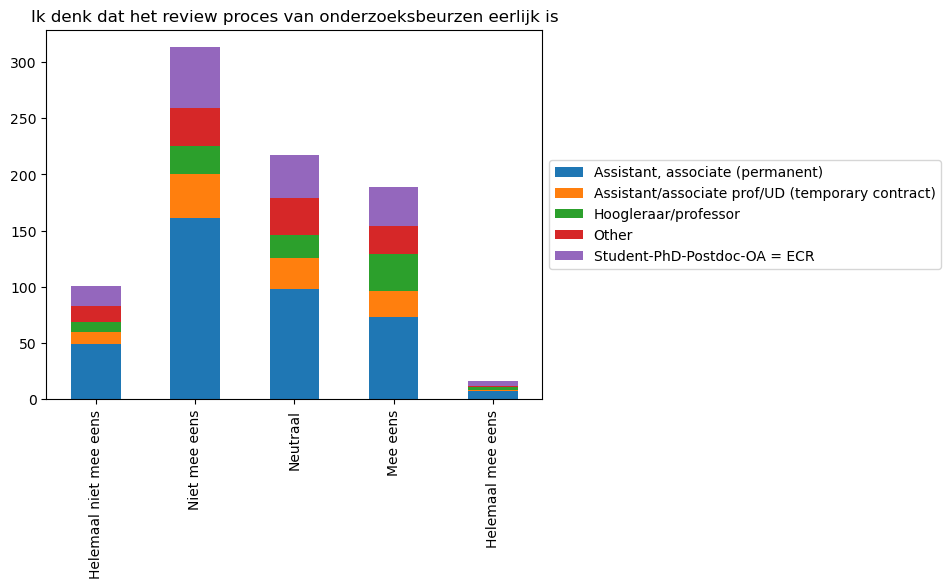

<Figure size 640x480 with 0 Axes>

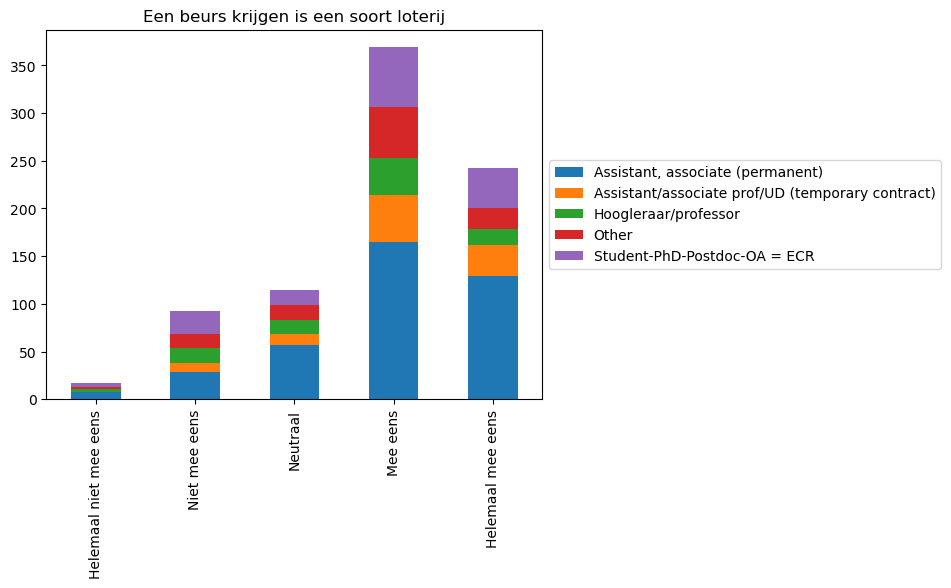

<Figure size 640x480 with 0 Axes>

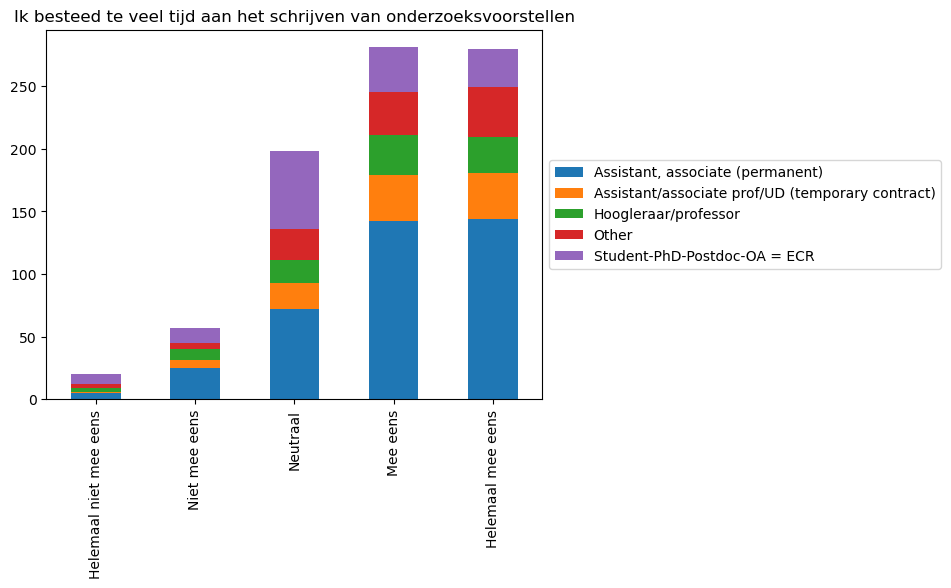

<Figure size 640x480 with 0 Axes>

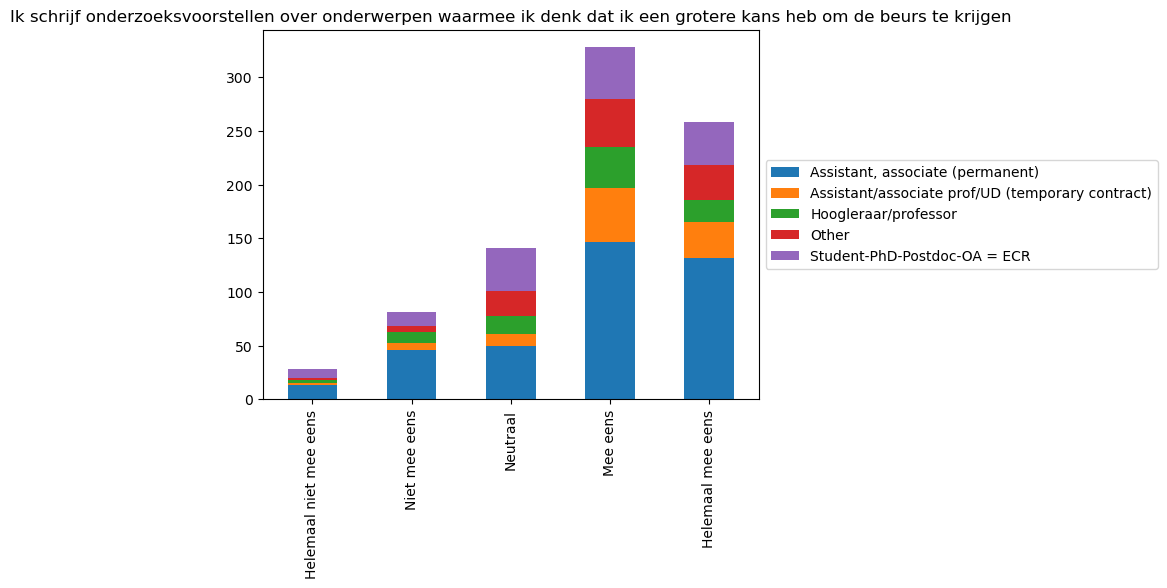

<Figure size 640x480 with 0 Axes>

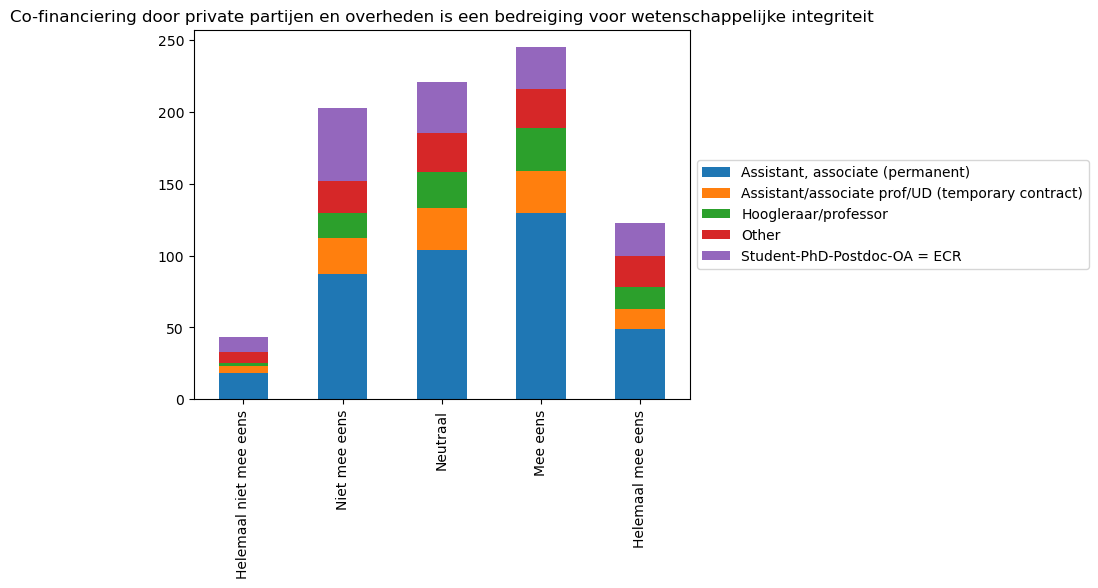

<Figure size 640x480 with 0 Axes>

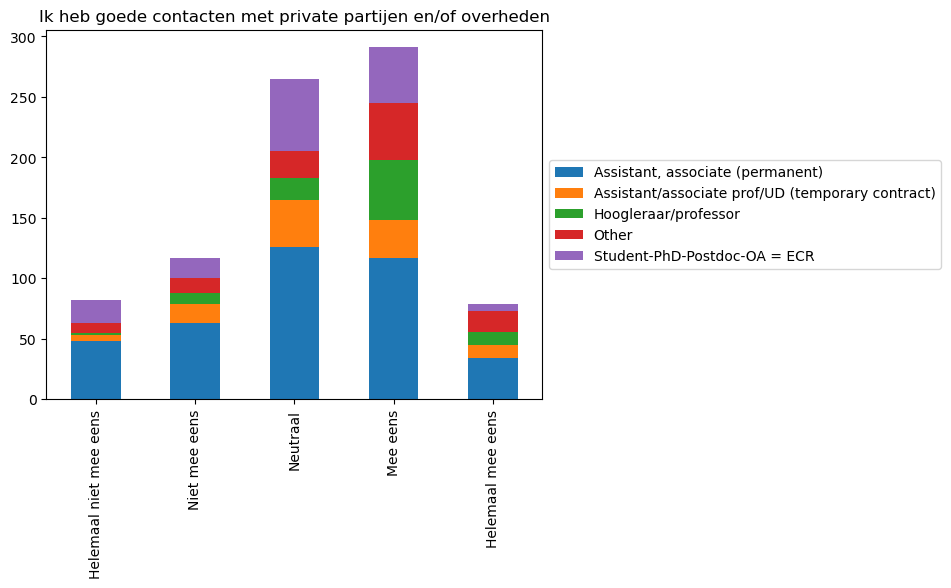

<Figure size 640x480 with 0 Axes>

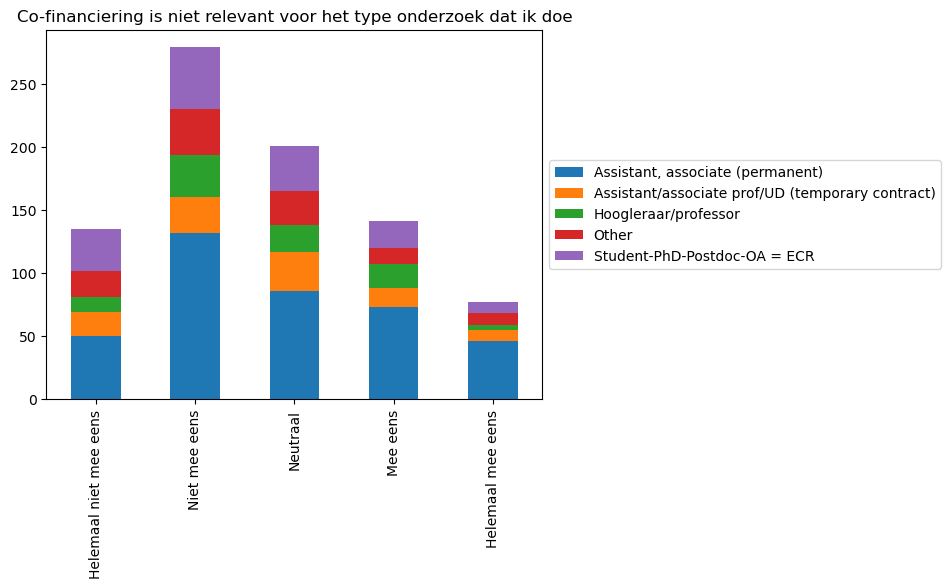

<Figure size 640x480 with 0 Axes>

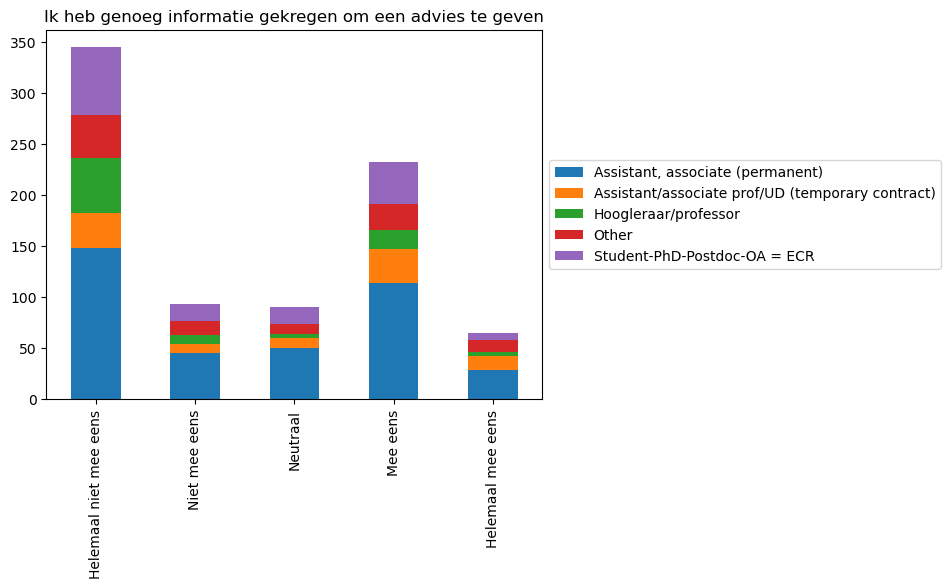

<Figure size 640x480 with 0 Axes>

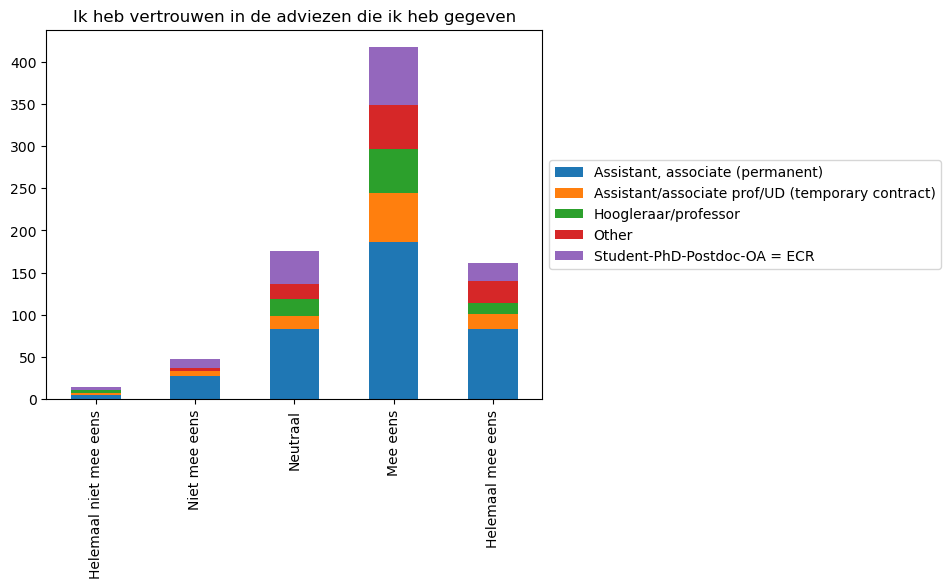

<Figure size 640x480 with 0 Axes>

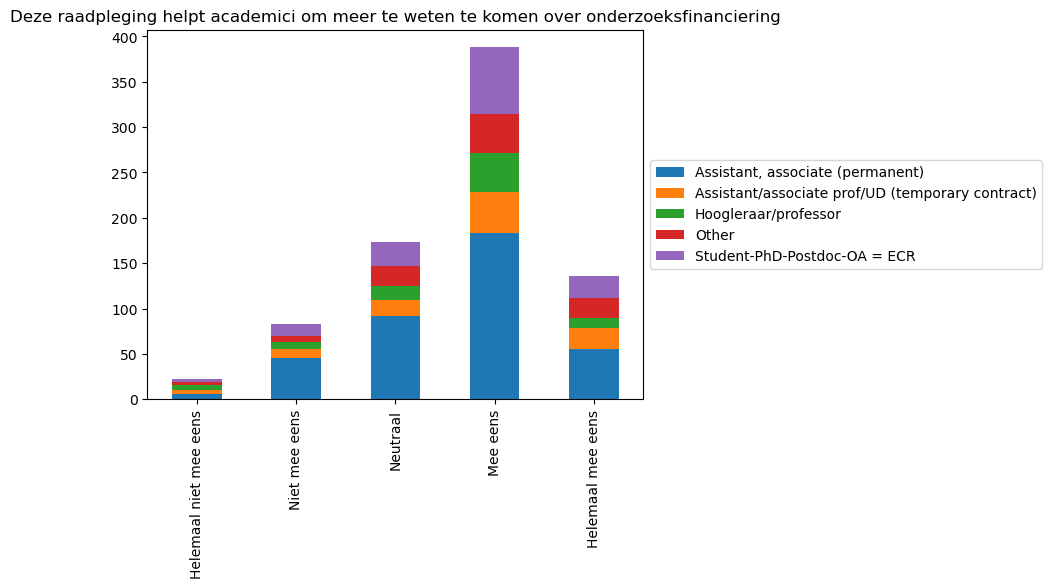

<Figure size 640x480 with 0 Axes>

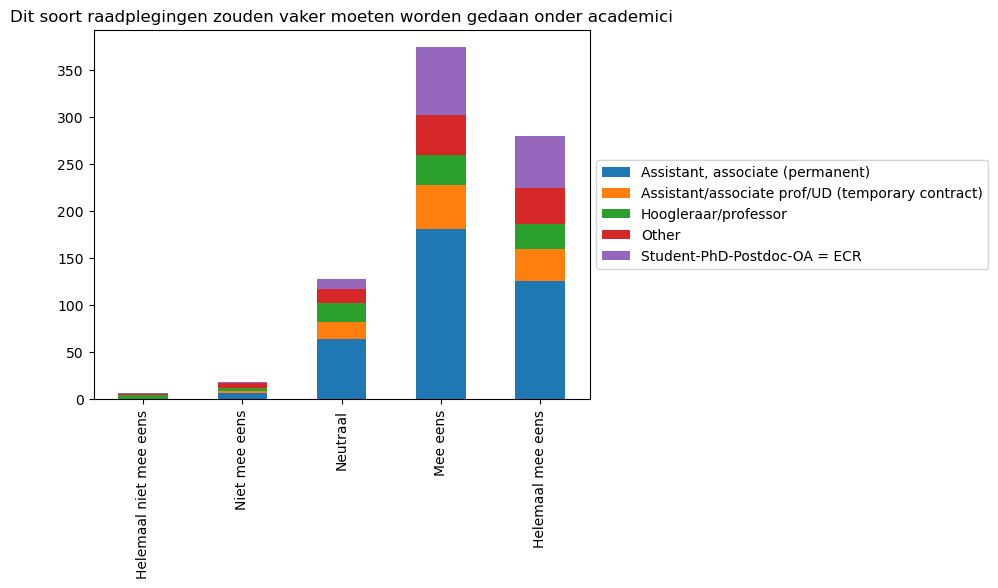

<Figure size 640x480 with 0 Axes>

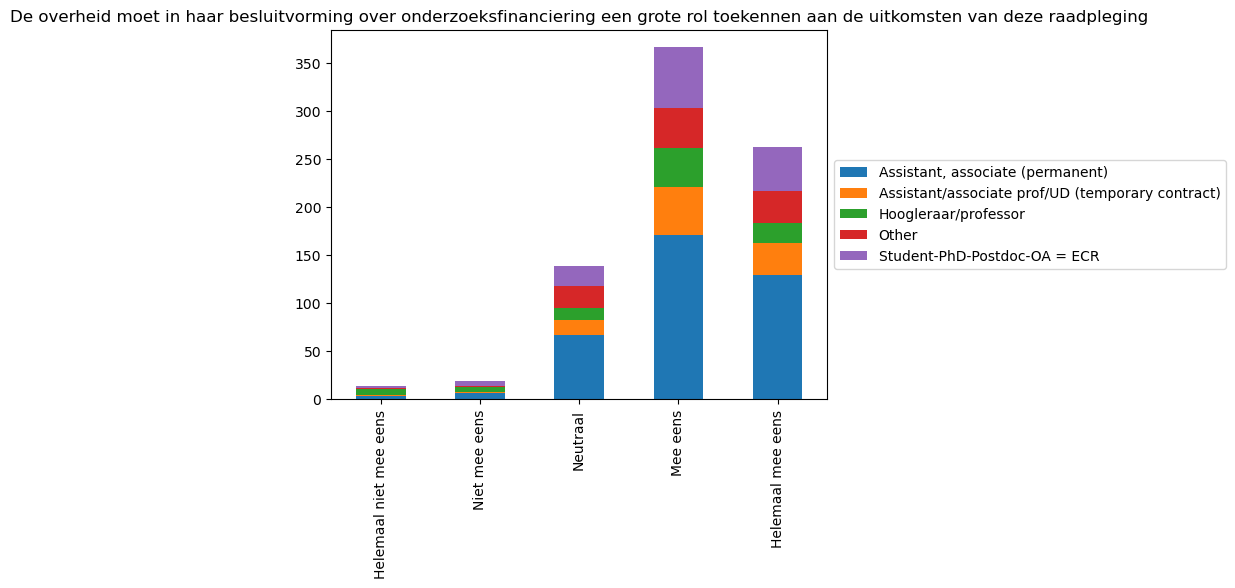

In [15]:
PLOTTING_FOLDER = 'plots_bar_stacked'
if not os.path.exists(PLOTTING_FOLDER):
    os.mkdir(PLOTTING_FOLDER)

for category in single_column_answers:
    create_stacked_bar_chart(consultation_data, variable_labels, index_interpretations, category, 'pos5', PLOTTING_FOLDER)

In [16]:
nested_questions = {'In hoeverre speelt onderstaande partij een rol bij het realiseren van je wetenschappelijke potentie?' :\
                    ['rol_supervisor', 'rol_head', 'rol_dean', 'rol_colleagues', 'rol_nwo', 'rol_ocw', 'rol_mentor'],\
                    'Wie zou het voor het zeggen moeten hebben mbt welk onderzoek gefinancierd wordt?' : \
                    ['who_researcher', 'who_manager', 'who_university', 'who_committee', 'who_government', 'who_society'],\
                    'Hoeveel tijd besteed je aan onderstaande activiteit?' :\
                    ['time_research', 'time_education', 'time_phds', 'time_management_low', 'time_management_hi',\
                     'time_service', 'time_admin', 'time_involvement', 'time_patients']
                   }

/var/folders/qj/5mq62lfj5zngm8hgp_wdrph80000gn/T/ipykernel_89265/1854894288.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

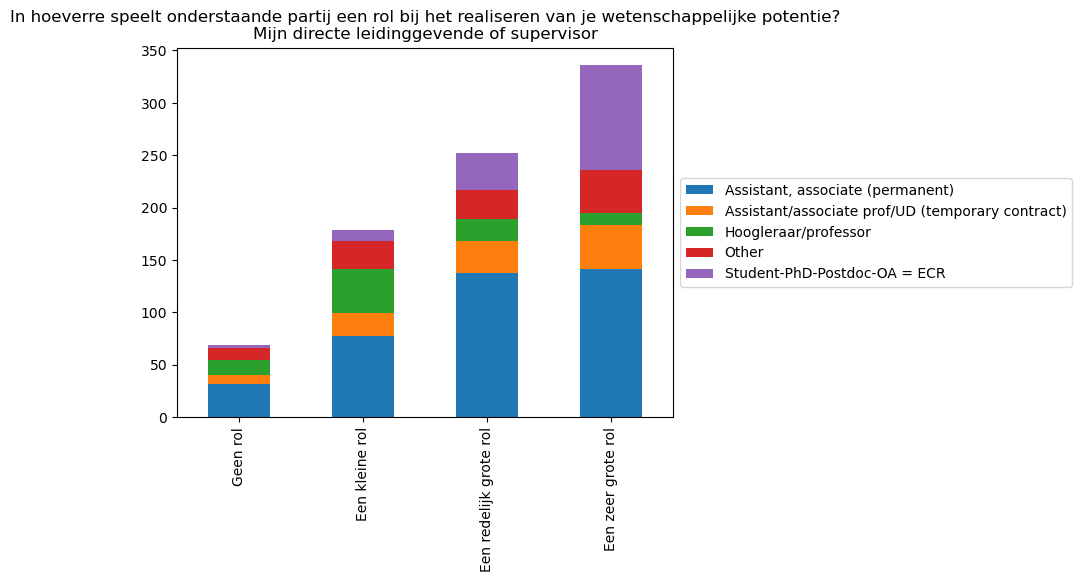

<Figure size 640x480 with 0 Axes>

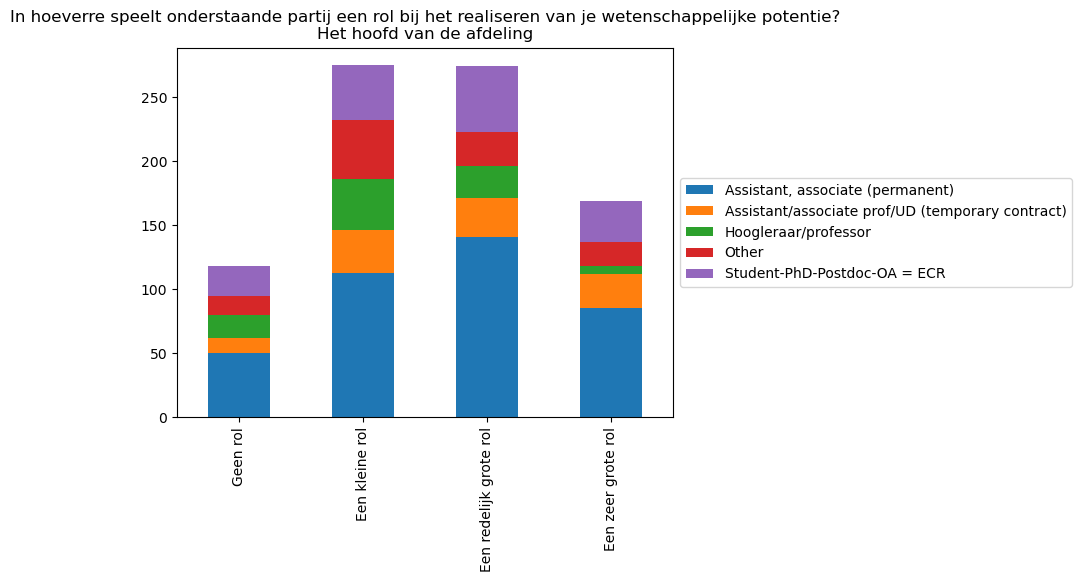

<Figure size 640x480 with 0 Axes>

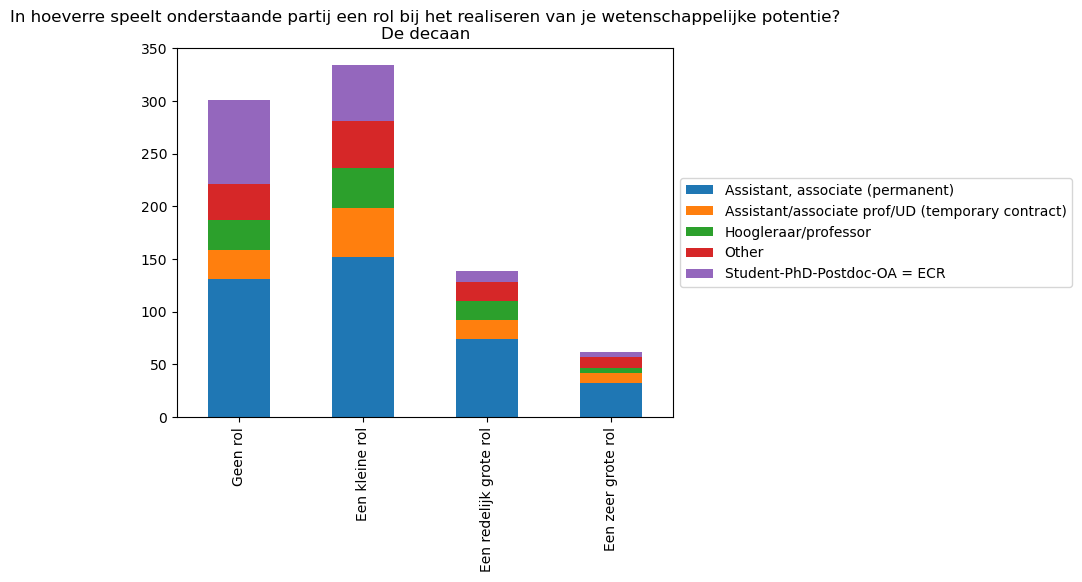

<Figure size 640x480 with 0 Axes>

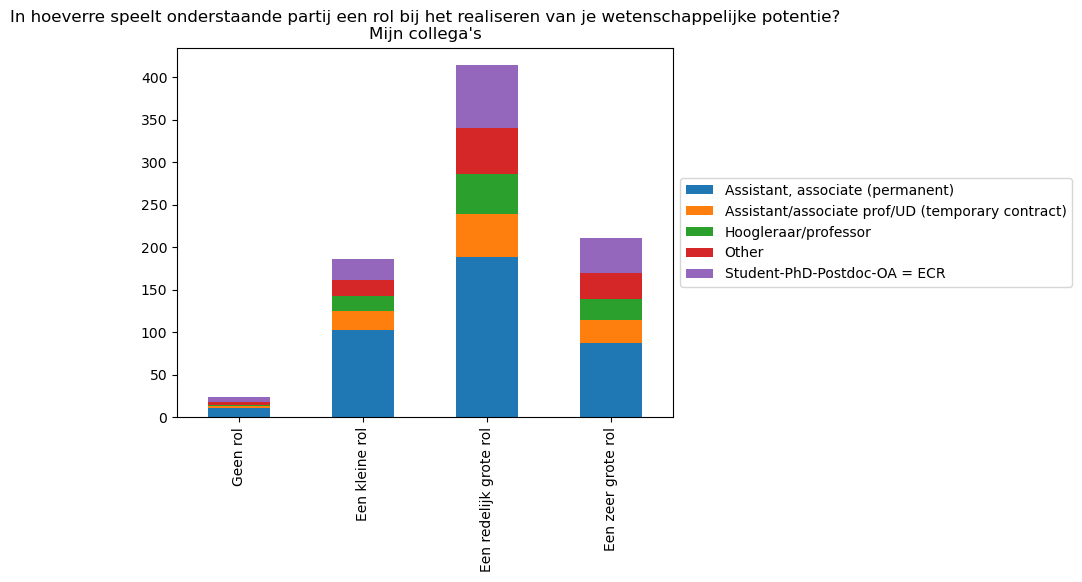

<Figure size 640x480 with 0 Axes>

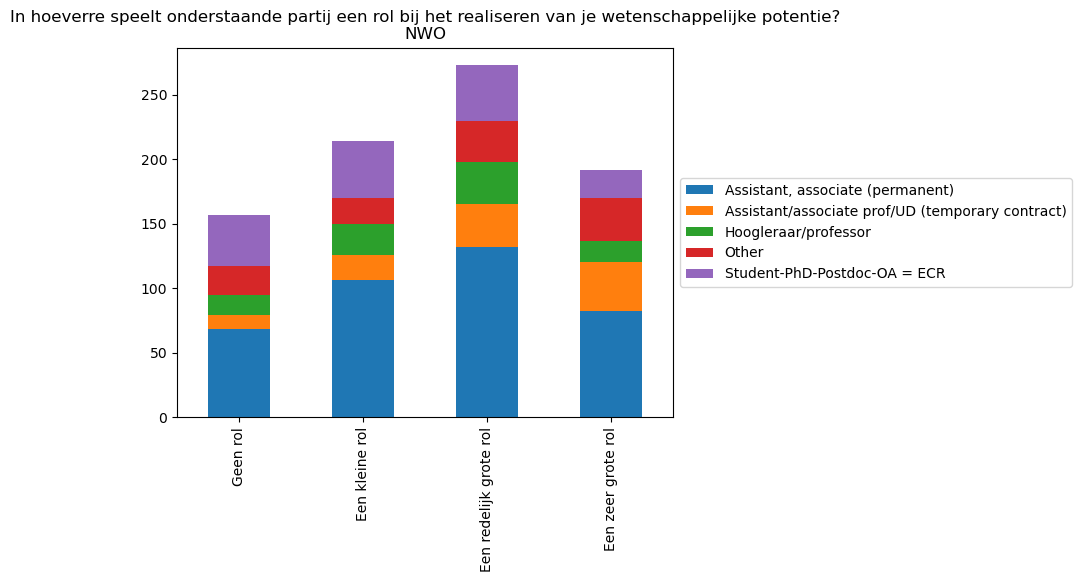

<Figure size 640x480 with 0 Axes>

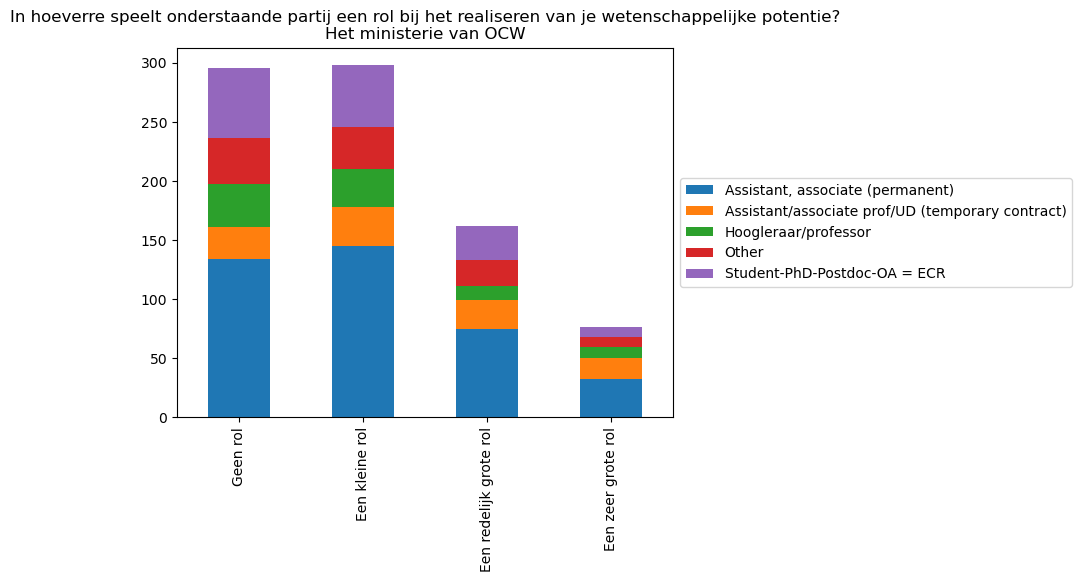

<Figure size 640x480 with 0 Axes>

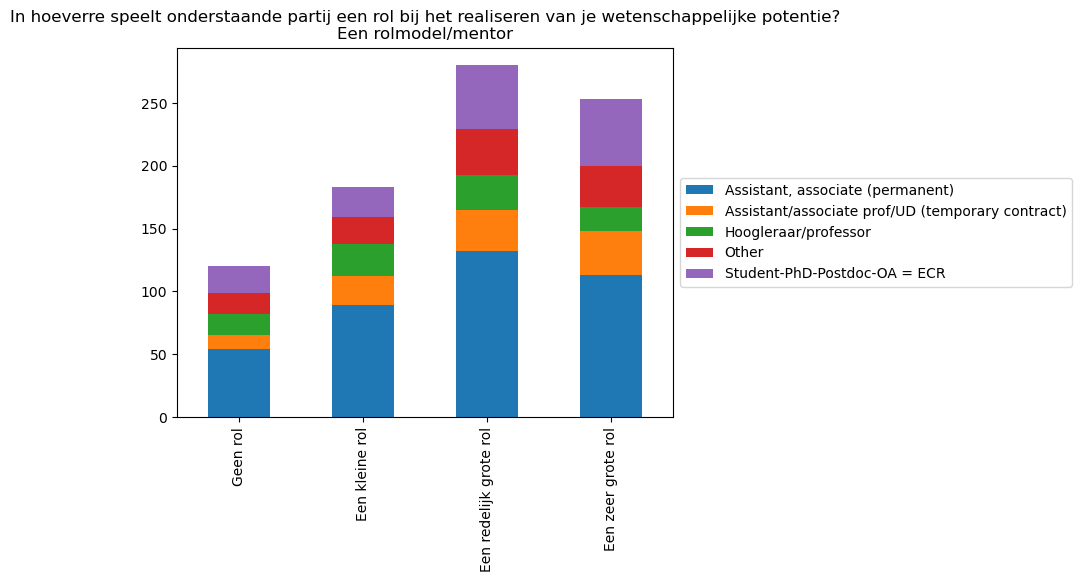

<Figure size 640x480 with 0 Axes>

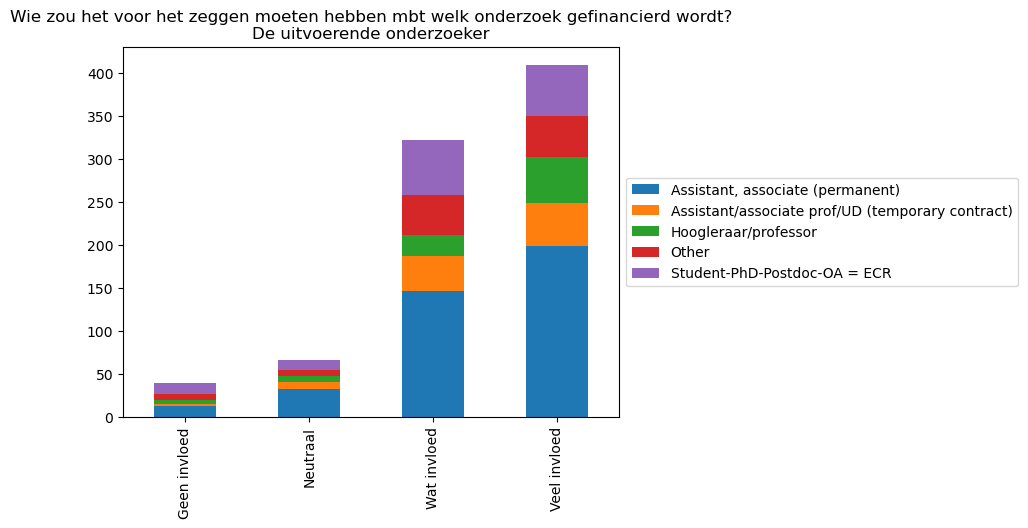

<Figure size 640x480 with 0 Axes>

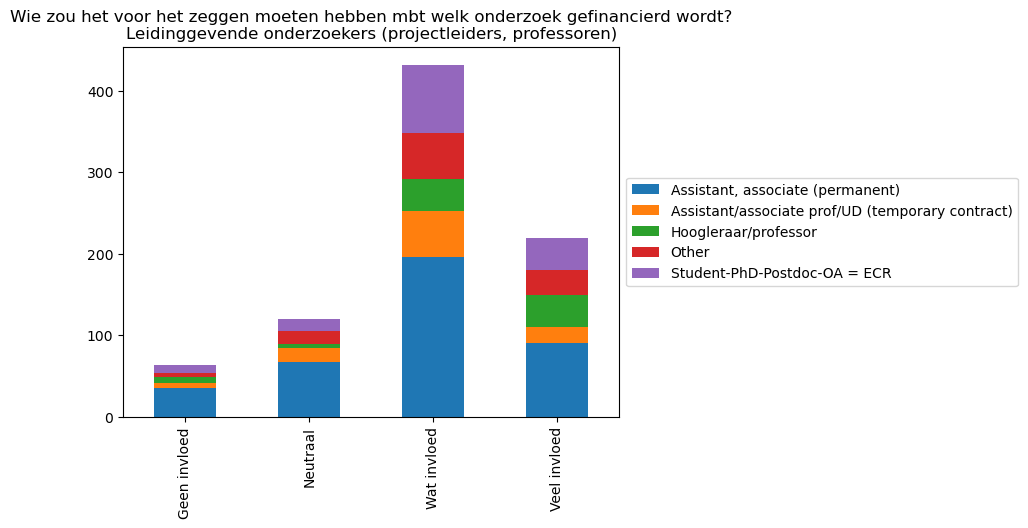

<Figure size 640x480 with 0 Axes>

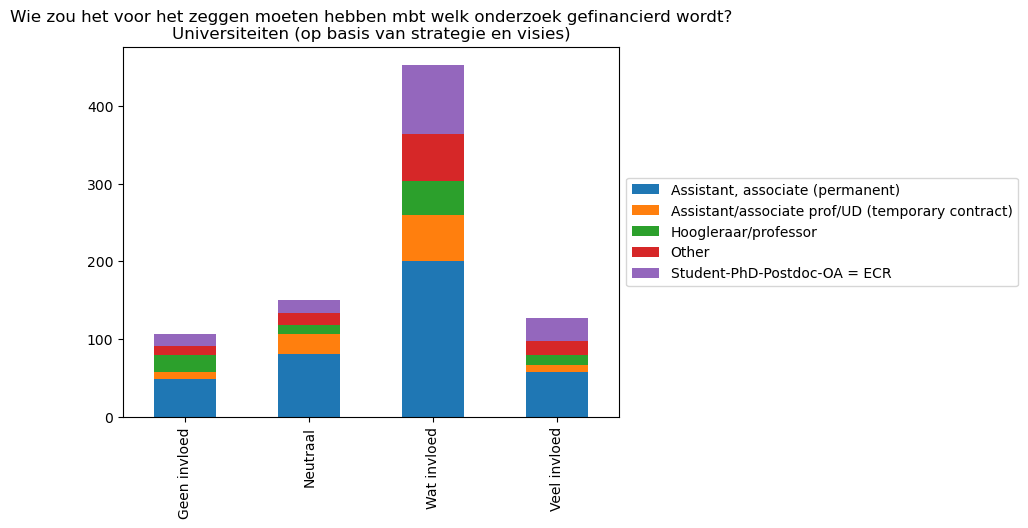

<Figure size 640x480 with 0 Axes>

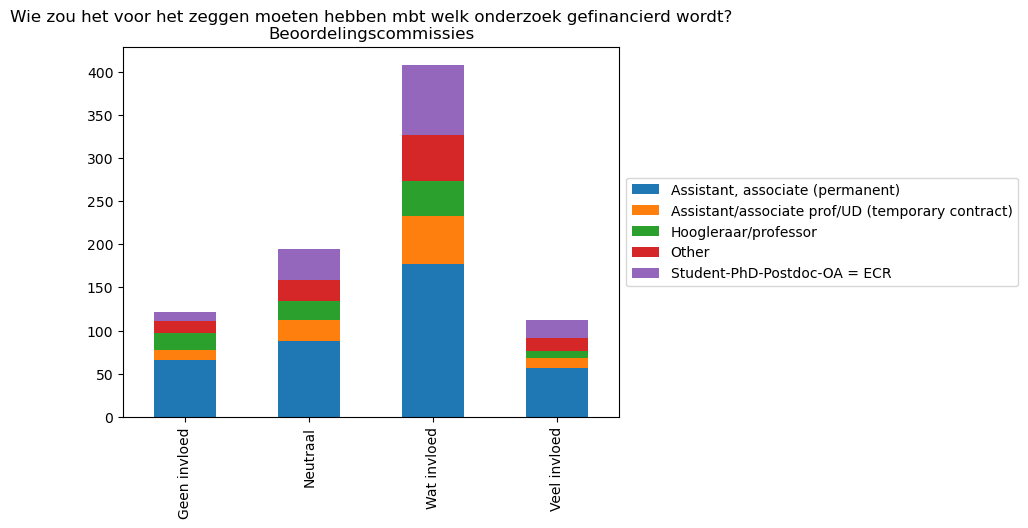

<Figure size 640x480 with 0 Axes>

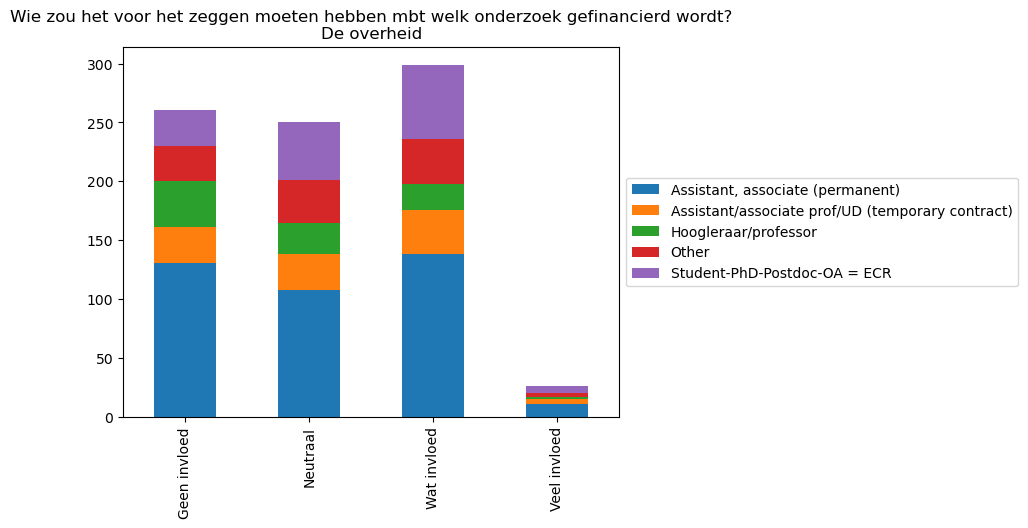

<Figure size 640x480 with 0 Axes>

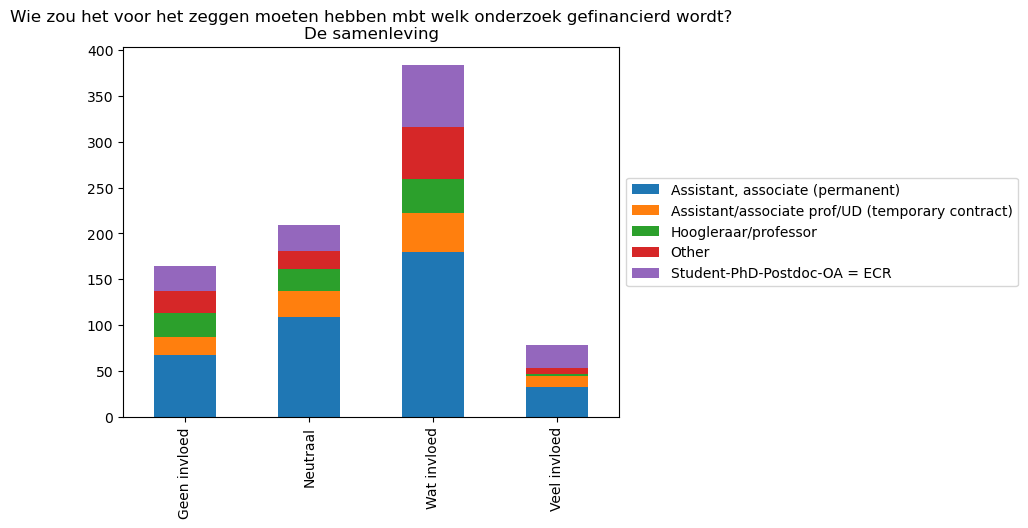

<Figure size 640x480 with 0 Axes>

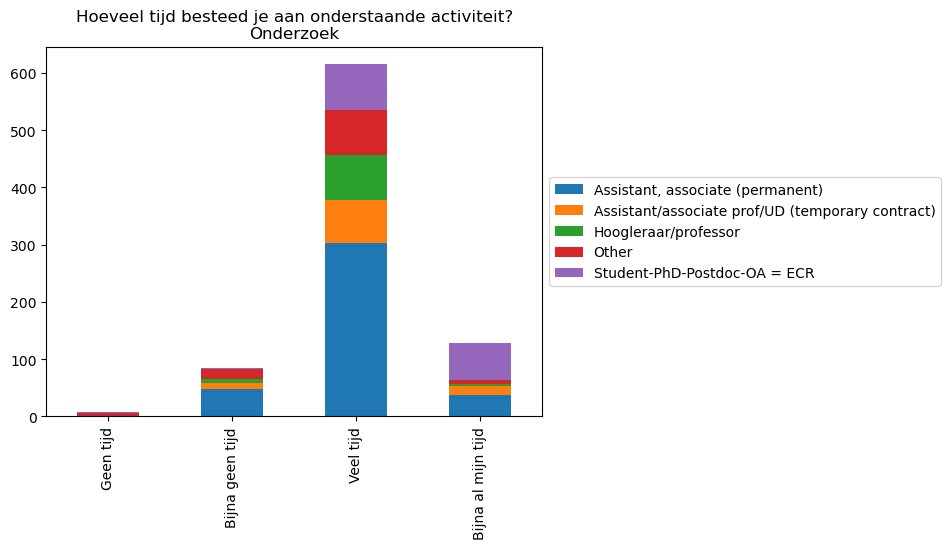

<Figure size 640x480 with 0 Axes>

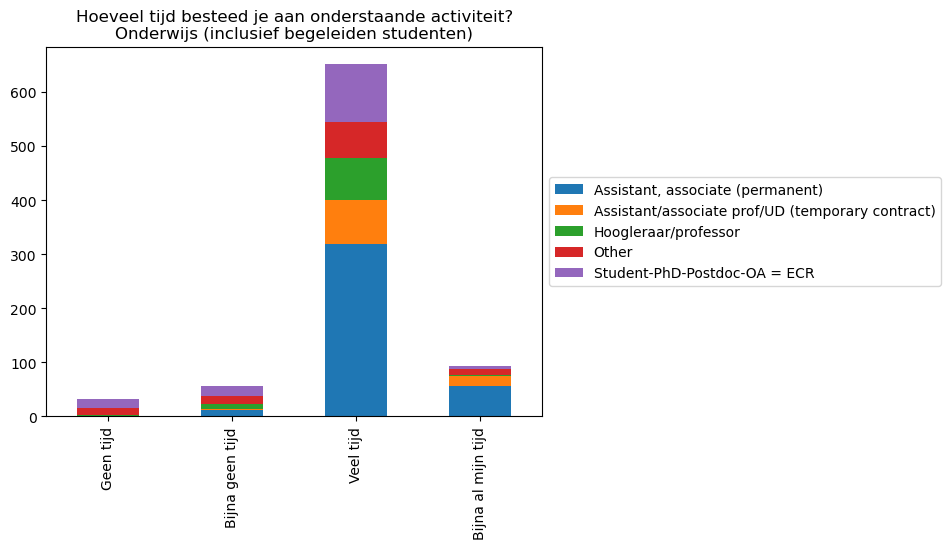

<Figure size 640x480 with 0 Axes>

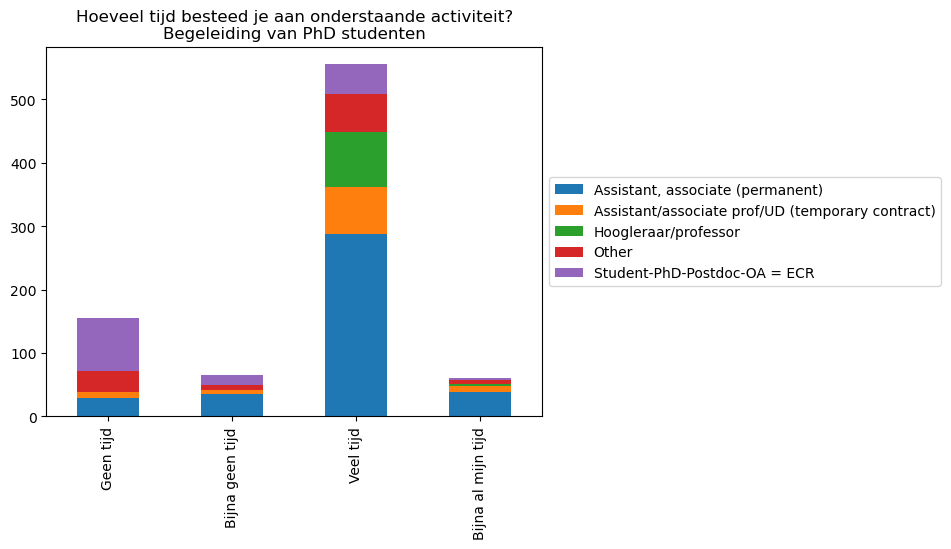

<Figure size 640x480 with 0 Axes>

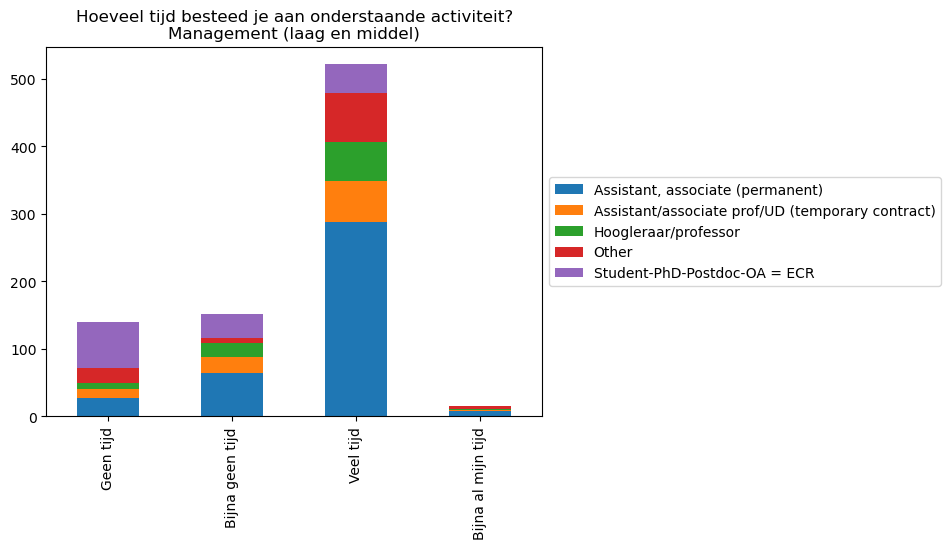

<Figure size 640x480 with 0 Axes>

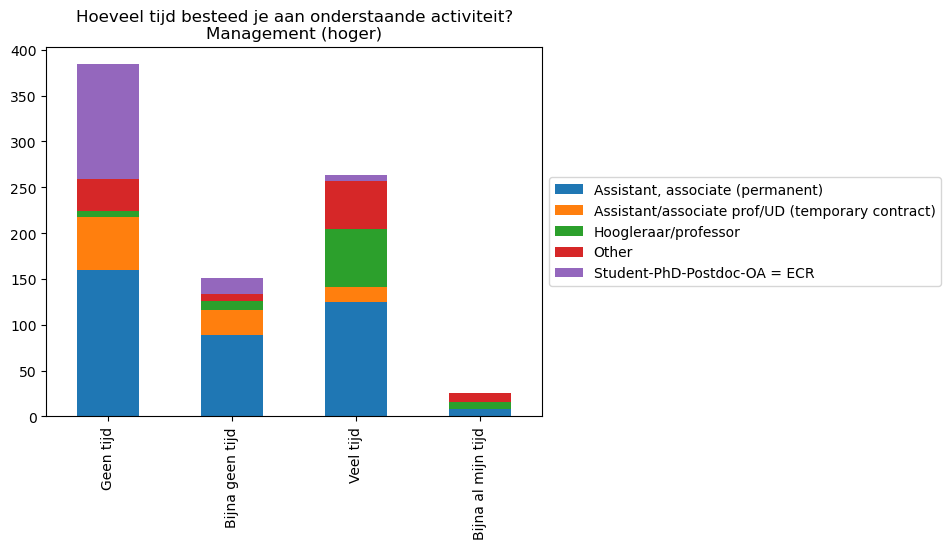

<Figure size 640x480 with 0 Axes>

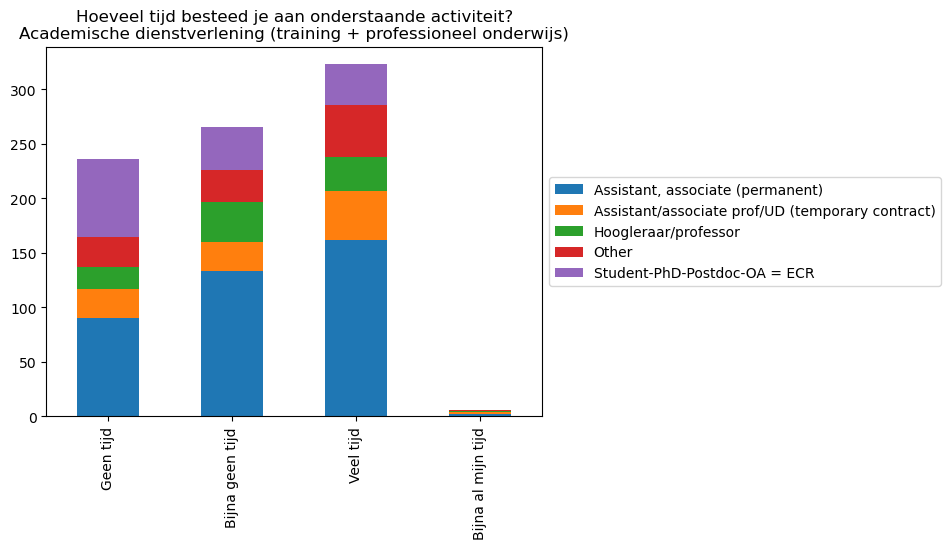

<Figure size 640x480 with 0 Axes>

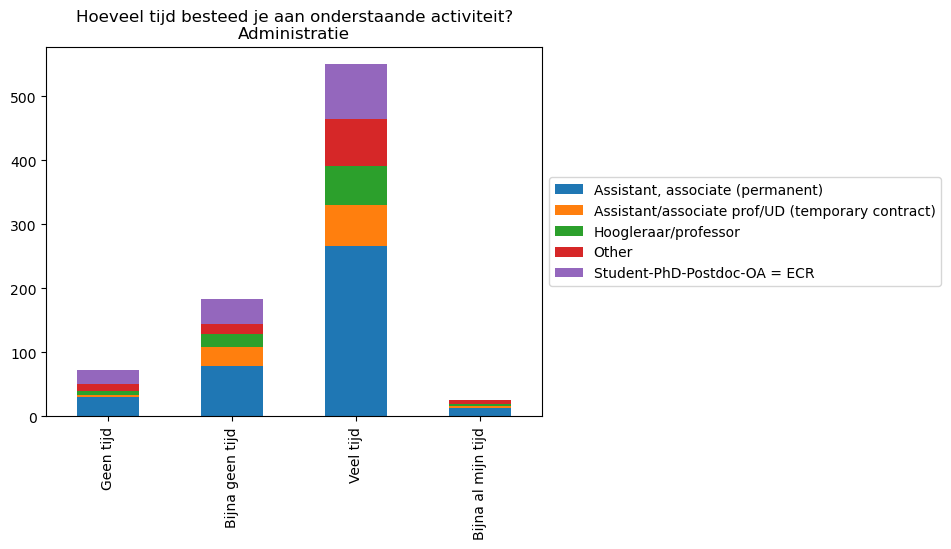

<Figure size 640x480 with 0 Axes>

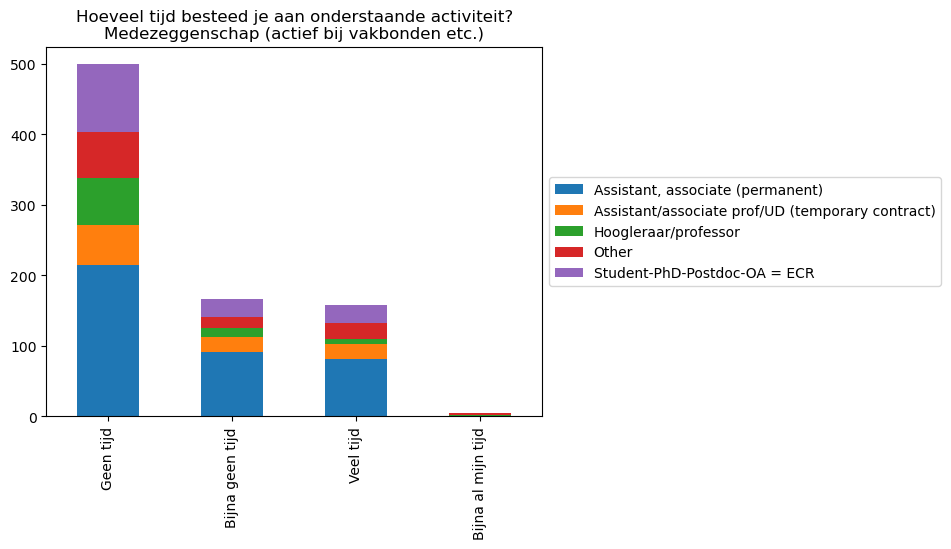

<Figure size 640x480 with 0 Axes>

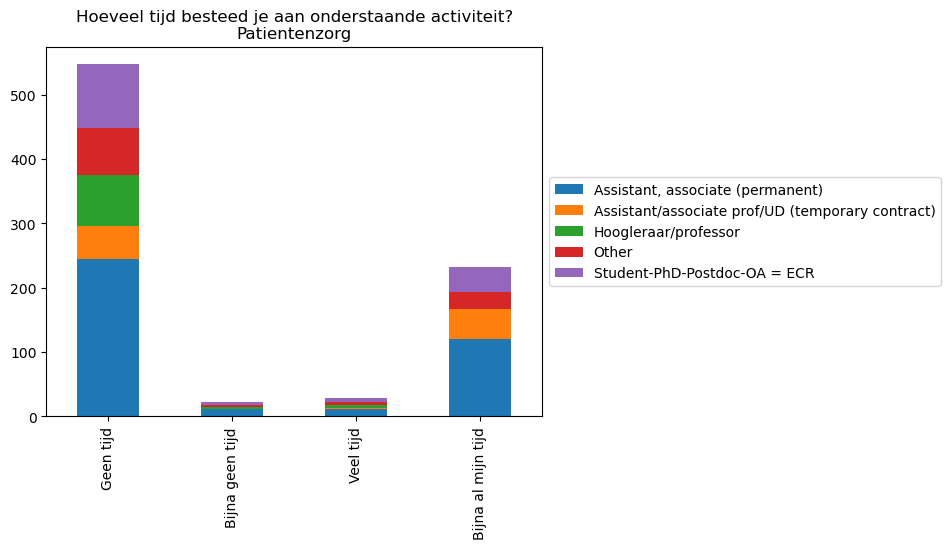

In [17]:
PLOTTING_FOLDER = 'plots_bar_stacked'
if not os.path.exists(PLOTTING_FOLDER):
    os.mkdir(PLOTTING_FOLDER)

for question_category in nested_questions:
    for category in nested_questions[question_category]:
        create_stacked_bar_chart(consultation_data, variable_labels, index_interpretations,\
                                 category, 'pos5', PLOTTING_FOLDER, question_category)

In [18]:
plt.close("all")

## Contrastive pie charts

### Awards are like lotteries

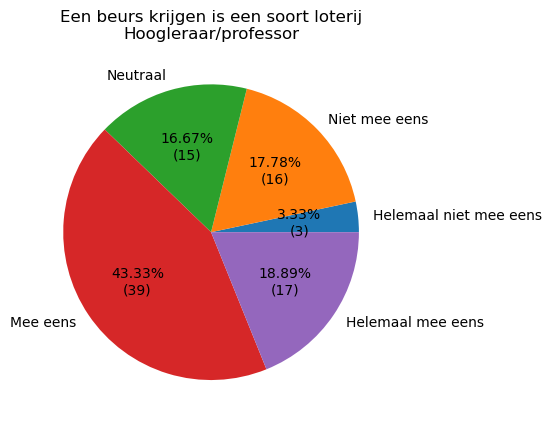

In [76]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_lottery', 'pos5', 'Hoogleraar/professor')

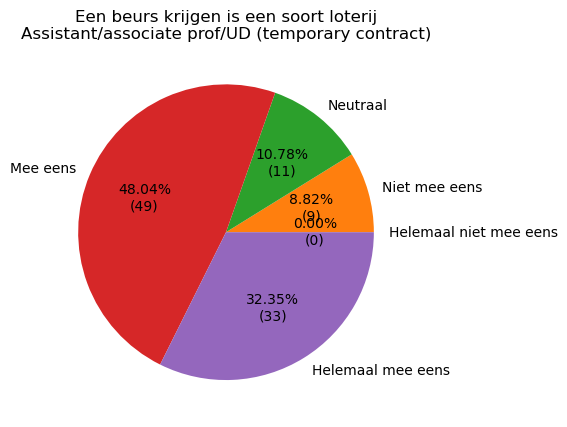

In [77]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_lottery', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### Current process is fair

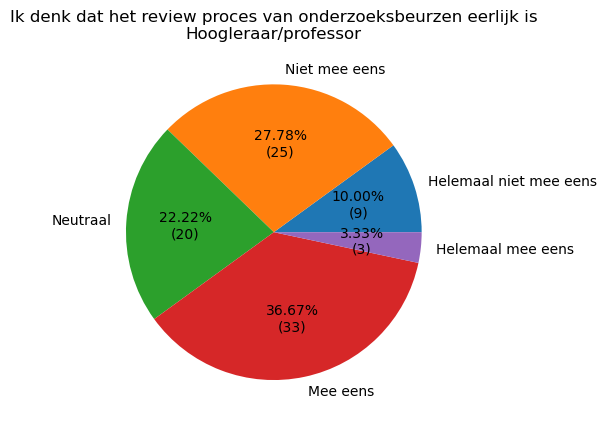

In [78]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_fair', 'pos5', 'Hoogleraar/professor')

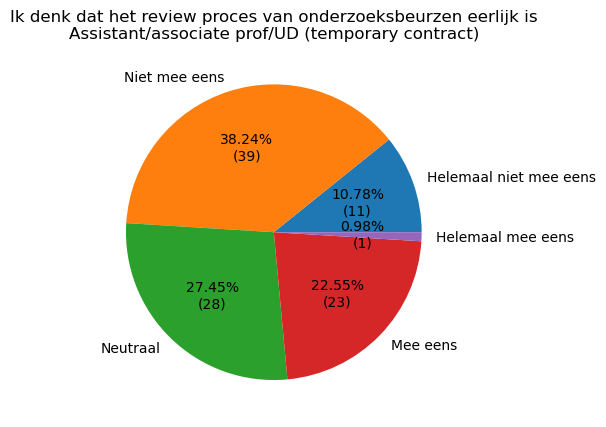

In [79]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_fair', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### Leading researchers should have the say in financing

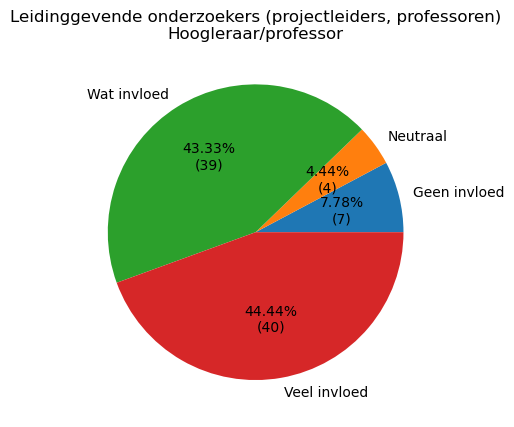

In [80]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_manager', 'pos5', 'Hoogleraar/professor')

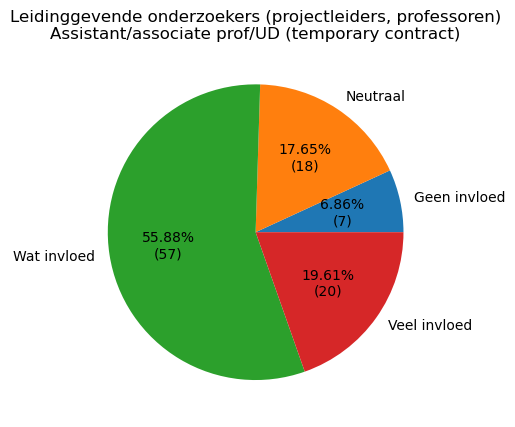

In [81]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_manager', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### Societal impact should have the say in financing

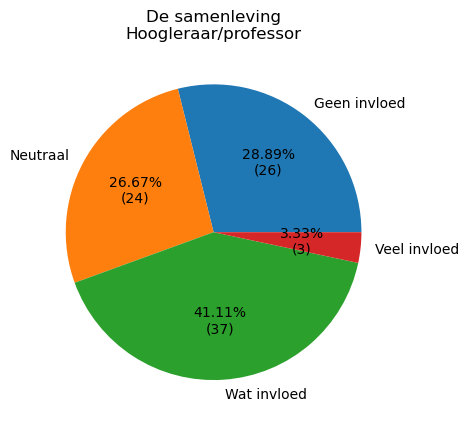

In [82]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_society', 'pos5', 'Hoogleraar/professor')

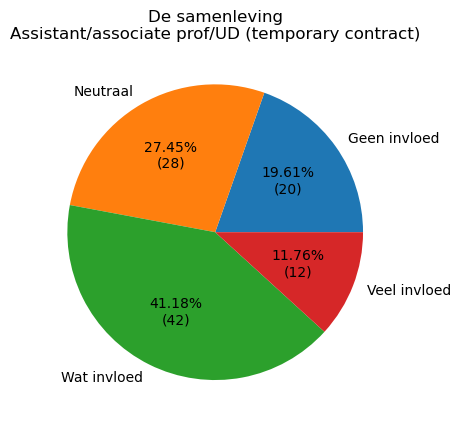

In [85]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_society', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### Grant committees should have the say on financing

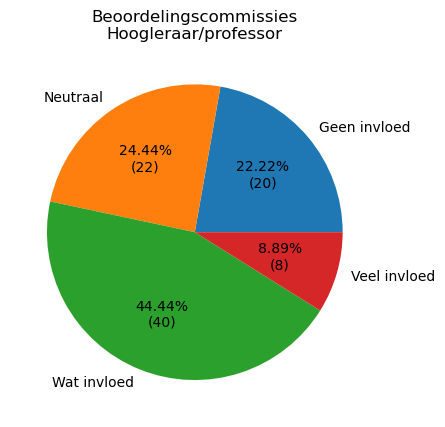

In [91]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_committee', 'pos5', 'Hoogleraar/professor')

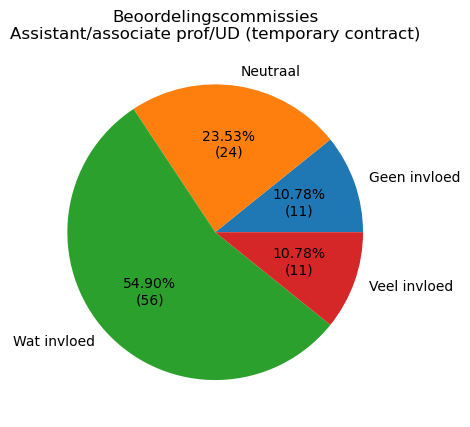

In [92]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'who_committee', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### Career success

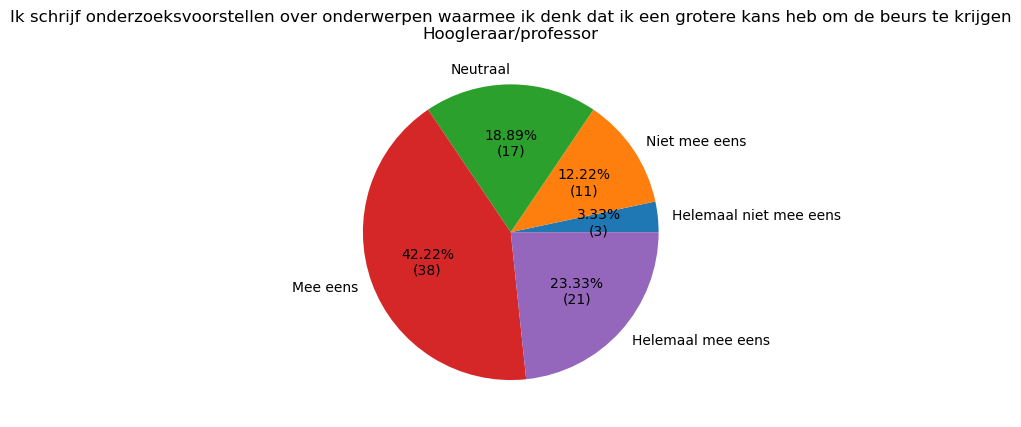

In [97]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_bandwagon', 'pos5', 'Hoogleraar/professor')

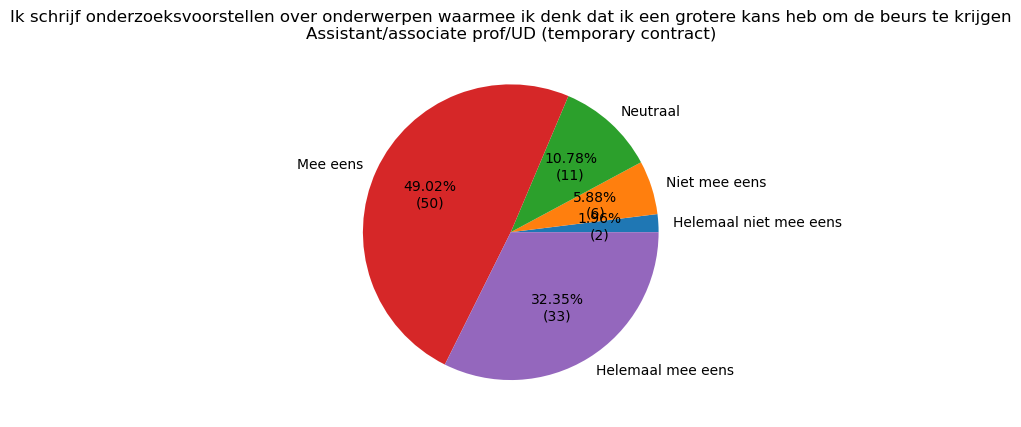

In [98]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'award_bandwagon', 'pos5', 'Assistant/associate prof/UD (temporary contract)')

### NWO

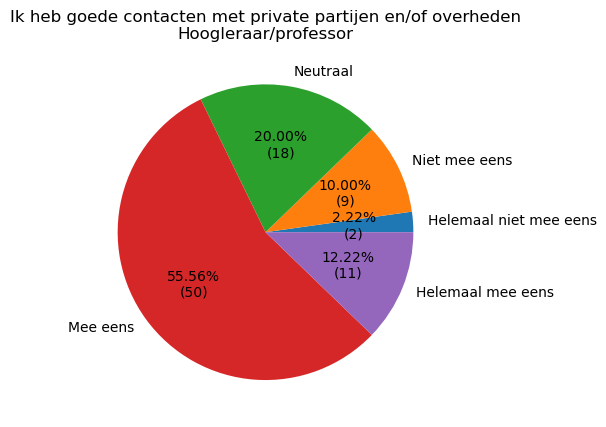

In [103]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'co_connections', 'pos5', 'Hoogleraar/professor')

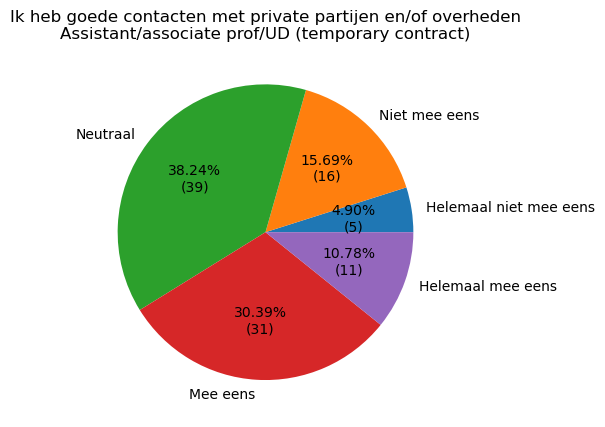

In [104]:
create_pie_chart(consultation_data, variable_labels, index_interpretations, 'co_connections', 'pos5', 'Assistant/associate prof/UD (temporary contract)')